# Problem 2:

##### The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

2.3) Comment on the comparison between covariance and the correlation matrix.

2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

2.5) Build the covariance matrix, eigenvalues, and eigenvector.

2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
Perform PCA and export the data of the Principal Component scores into a data frame.

2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

In [15]:
# Importing os to set the path
import os
os.getcwd()

'C:\\Users\\suhas\\Desktop\\Great Learning\\3.Advanced Statistics\\Final Assignement'

In [16]:
# change dirctory to where the file is
os.chdir('C:\\Users\\suhas\\Desktop\\Great Learning\\3.Advanced Statistics\\Final Assignement')
os.getcwd()


'C:\\Users\\suhas\\Desktop\\Great Learning\\3.Advanced Statistics\\Final Assignement'

In [17]:
# All necessary files required for visualization, statistical Analysis.
# Import pandas for dataframe Operations
# Import numpy for Numerical Operations, array manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns # It is based on the top of matplotlib, for better visulization
import matplotlib.pyplot as plt # color palette
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [18]:
# Reading csv in dataframe
df=pd.read_csv('Education - Post 12th Standard-1.csv')

In [19]:
# To see how data is distributed, Head function will give you first five rows
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [20]:
# by Shape, we will get the row and Column idea, 777 rows and 18 columns
df.shape

(777, 18)

In [21]:
# All info related to dataset, datatype , Null values or missing values
# No missing values are there in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [22]:
# to get the idea of rows
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [23]:
# No null values are present in dataset
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Outlier Treatment

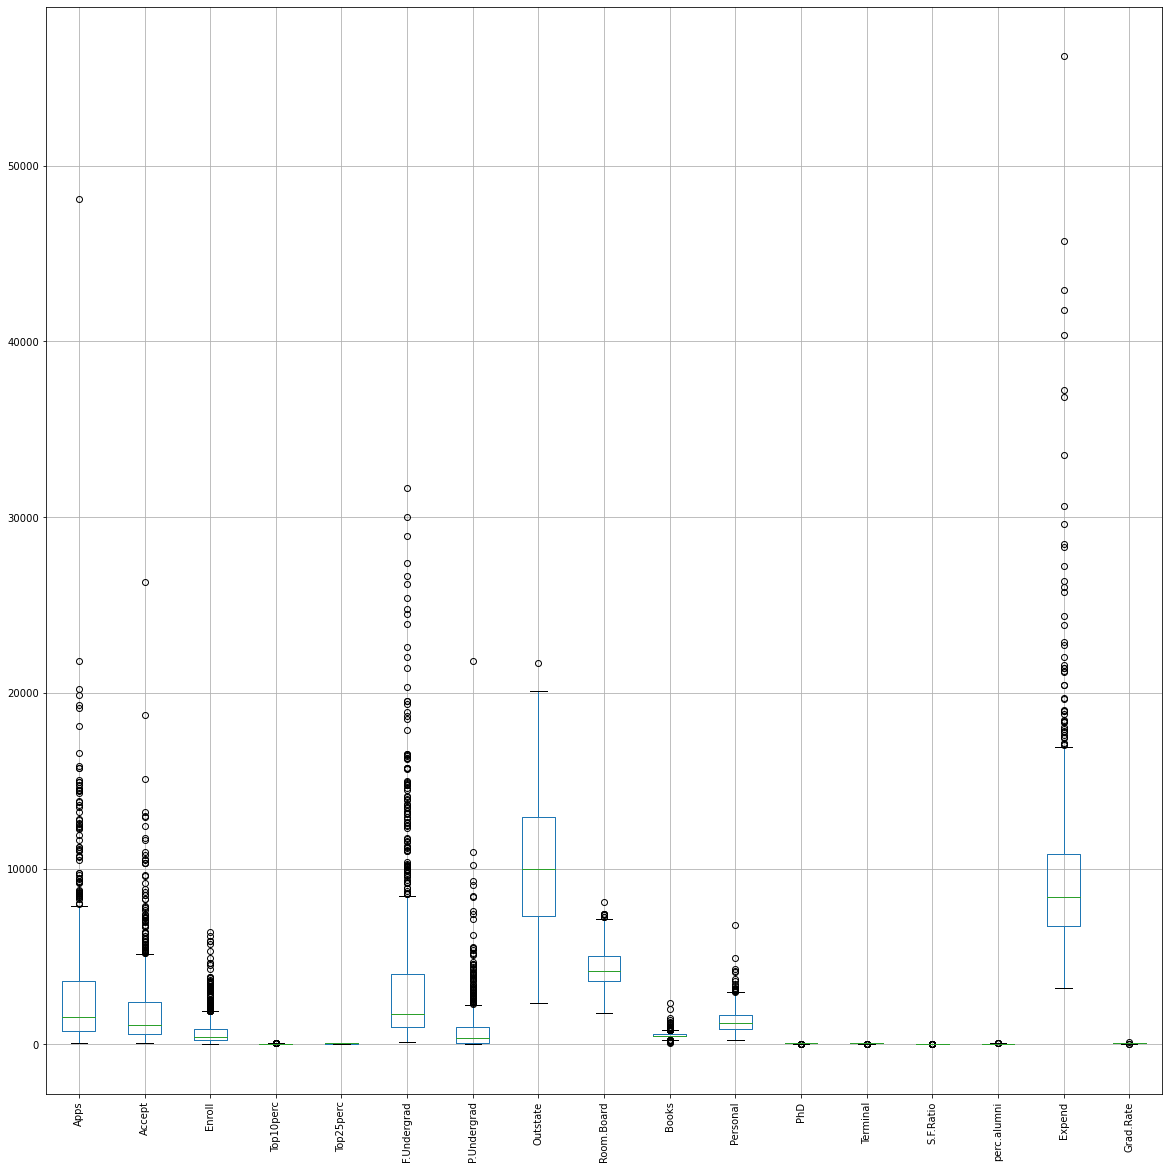

In [24]:
# Lets check for Outliers, by plotting a boxplot.
# Top25perc and Outstate Students have low or no outliers. 
# other variables have high outliers, to treat these outliers we will do treatment.
df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [25]:
# We will copy the data from df to df4. 
# We will treat dataframe df4 to remain df unchanged. 
df4=df.copy()
df4.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [26]:
# Define function to Remove Outliers, In this we are calculating Q1,Q3,Inter Quartile range
# This function is Returning lower_range and Upper range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
# Outlier Treatment by using user defined Function "remove_outlier".
# In lrapps we are saving result of lower range and in urapps we are saving result of upper range
lrapps,urapps=remove_outlier(df4['Apps'])

# data point which is greater than upper range we are replacing it with upper range and saving result in dataframe df4
df4['Apps']=np.where(df4['Apps']>urapps,urapps,df4['Apps'])

# data point which is lesser than lower range we are replacing it with upper range and saving result in dataframe df4
df4['Apps']=np.where(df4['Apps']<lrapps,lrapps,df4['Apps'])

# We are following same pattern-function for every variable, which has outliers
lraccept,uraccept=remove_outlier(df4['Accept'])
df4['Accept']=np.where(df4['Accept']>uraccept,uraccept,df4['Accept'])
df4['Accept']=np.where(df4['Accept']<lraccept,lraccept,df4['Accept'])

lrenroll,urenroll=remove_outlier(df4['Enroll'])
df4['Enroll']=np.where(df4['Enroll']>urenroll,urenroll,df4['Enroll'])
df4['Enroll']=np.where(df4['Enroll']<lrenroll,lrenroll,df4['Enroll'])

lrtop25,urtop25=remove_outlier(df4['Top25perc'])
df4['Top25perc']=np.where(df4['Top25perc']>urtop25,urtop25,df4['Top25perc'])
df4['Top25perc']=np.where(df4['Top25perc']<lrtop25,lrtop25,df4['Top25perc'])

lrtop10,urtop10=remove_outlier(df4['Top10perc'])
df4['Top10perc']=np.where(df4['Top10perc']>urtop10,urtop10,df4['Top10perc'])
df4['Top10perc']=np.where(df4['Top10perc']<lrtop10,lrtop10,df4['Top10perc'])

lrfulltime,urfulltime=remove_outlier(df4['F.Undergrad'])
df4['F.Undergrad']=np.where(df4['F.Undergrad']>urfulltime,urfulltime,df4['F.Undergrad'])
df4['F.Undergrad']=np.where(df4['F.Undergrad']<lrfulltime,lrfulltime,df4['F.Undergrad'])

lrparttime,urparttime=remove_outlier(df4['P.Undergrad'])
df4['P.Undergrad']=np.where(df4['P.Undergrad']>urparttime,urparttime,df4['P.Undergrad'])
df4['P.Undergrad']=np.where(df4['P.Undergrad']<lrparttime,lrparttime,df4['P.Undergrad'])

lrroom,urroom=remove_outlier(df4['Room.Board'])
df4['Room.Board']=np.where(df4['Room.Board']>urroom,urroom,df4['Room.Board'])
df4['Room.Board']=np.where(df4['Room.Board']<lrroom,lrroom,df4['Room.Board'])

lrbooks,urbooks=remove_outlier(df4['Books'])
df4['Books']=np.where(df4['Books']>urbooks,urbooks,df4['Books'])
df4['Books']=np.where(df4['Books']<lrbooks,lrbooks,df4['Books'])

lrpersonal,urpersonal=remove_outlier(df4['Personal'])
df4['Personal']=np.where(df4['Personal']>urpersonal,urpersonal,df4['Personal'])
df4['Personal']=np.where(df4['Personal']<lrpersonal,lrpersonal,df4['Personal'])

lrphd,urphd=remove_outlier(df4['PhD'])
df4['PhD']=np.where(df4['PhD']>urphd,urphd,df4['PhD'])
df4['PhD']=np.where(df4['PhD']<lrphd,lrphd,df4['PhD'])

lrterminal,urterminal=remove_outlier(df4['Terminal'])
df4['Terminal']=np.where(df4['Terminal']>urterminal,urterminal,df4['Terminal'])
df4['Terminal']=np.where(df4['Terminal']<lrterminal,lrterminal,df4['Terminal'])

lrexpend,urexpend=remove_outlier(df4['Expend'])
df4['Expend']=np.where(df4['Expend']>urexpend,urexpend,df4['Expend'])
df4['Expend']=np.where(df4['Expend']<lrexpend,lrexpend,df4['Expend'])

lrgrad,urgrad=remove_outlier(df4['Grad.Rate'])
df4['Grad.Rate']=np.where(df4['Grad.Rate']>urgrad,urgrad,df4['Grad.Rate'])
df4['Grad.Rate']=np.where(df4['Grad.Rate']<lrgrad,lrgrad,df4['Grad.Rate'])

lralumni,uralumni=remove_outlier(df4['perc.alumni'])
df4['perc.alumni']=np.where(df4['perc.alumni']>uralumni,uralumni,df4['perc.alumni'])
df4['perc.alumni']=np.where(df4['perc.alumni']<lralumni,lralumni,df4['perc.alumni'])

lrsfratio,ursfratio=remove_outlier(df4['S.F.Ratio'])
df4['S.F.Ratio']=np.where(df4['S.F.Ratio']>ursfratio,ursfratio,df4['S.F.Ratio'])
df4['S.F.Ratio']=np.where(df4['S.F.Ratio']<lrsfratio,lrsfratio,df4['S.F.Ratio'])


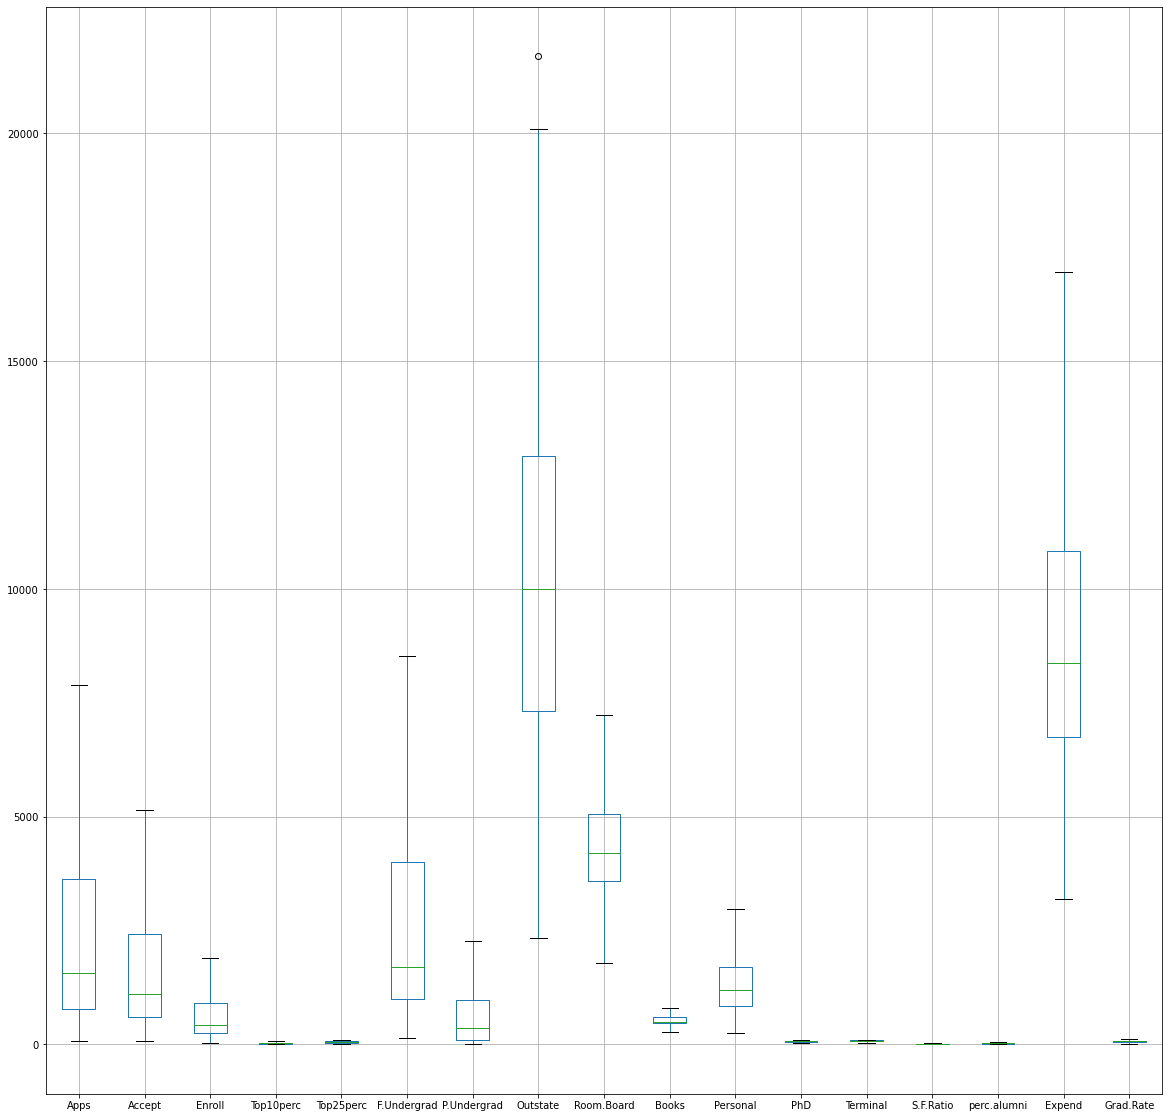

In [28]:
# Data After Outlier Treatment...........Almost No Outliers
df4.boxplot(figsize=(20,20))

##### 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

Lets plot a distplot to see how the data is distributed

Text(0.5, 1.0, 'Cost of Room and board')

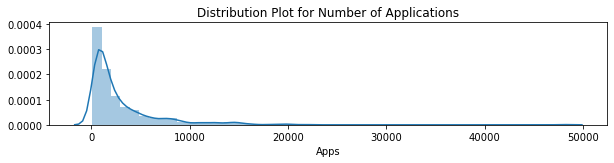

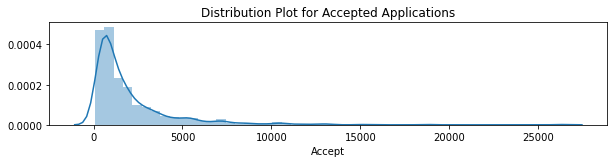

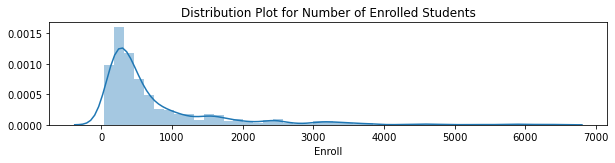

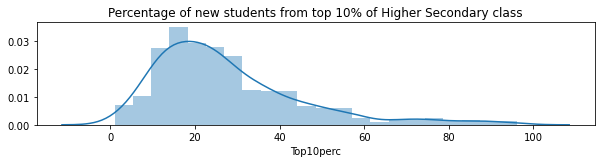

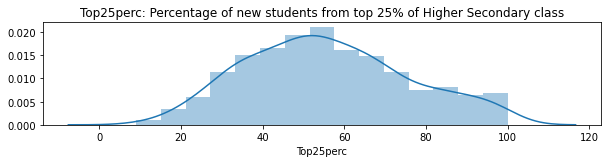

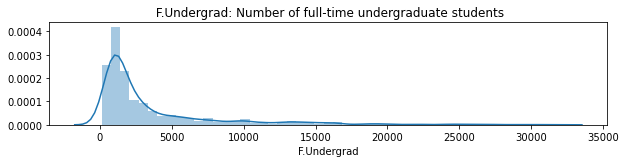

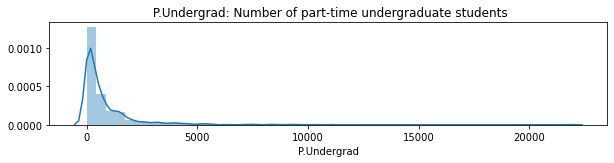

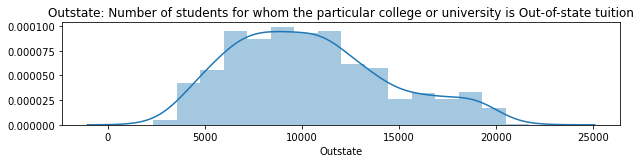

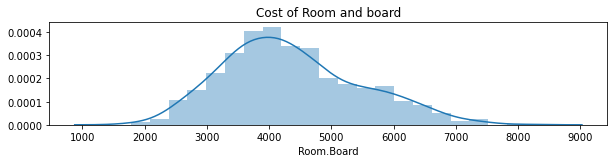

In [29]:
#Creating Univariate Distribution plot to analyse each variable thouroughly, we will get outliers then
# Shape of plot, How is the distribution.
# by plotting pairplot,Heatmap we can see correlation between two different variables.
# We will get the initial idea of distribution here.

# Lets plot a distriution plot for Number of Applications.
plt.figure(figsize=(10,20))
plt.subplot(911)
sns.distplot(df['Apps']).set_title('Distribution Plot for Number of Applications')

plt.figure(figsize=(10,20))
plt.subplot(912)
sns.distplot(df['Accept']).set_title('Distribution Plot for Accepted Applications')

plt.figure(figsize=(10,20))
plt.subplot(913)
sns.distplot(df['Enroll']).set_title('Distribution Plot for Number of Enrolled Students')

plt.figure(figsize=(10,20))
plt.subplot(914)
sns.distplot(df['Top10perc']).set_title('Percentage of new students from top 10% of Higher Secondary class')

plt.figure(figsize=(10,20))
plt.subplot(915)
sns.distplot(df['Top25perc']).set_title('Top25perc: Percentage of new students from top 25% of Higher Secondary class')

plt.figure(figsize=(10,20))
plt.subplot(916)
sns.distplot(df['F.Undergrad']).set_title(' F.Undergrad: Number of full-time undergraduate students')

plt.figure(figsize=(10,20))
plt.subplot(917)
sns.distplot(df['P.Undergrad']).set_title(' P.Undergrad: Number of part-time undergraduate students')

plt.figure(figsize=(10,20))
plt.subplot(918)
sns.distplot(df['Outstate']).set_title('Outstate: Number of students for whom the particular college or university is Out-of-state tuition')

plt.figure(figsize=(10,20))
plt.subplot(919)
sns.distplot(df['Room.Board']).set_title('Cost of Room and board')



Text(0.5, 1.0, 'Grad.Rate: Graduation rate')

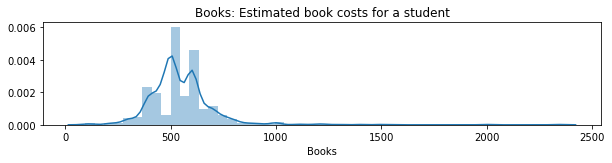

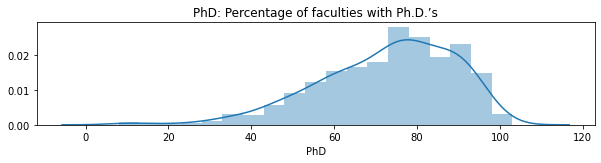

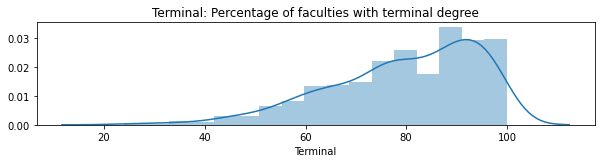

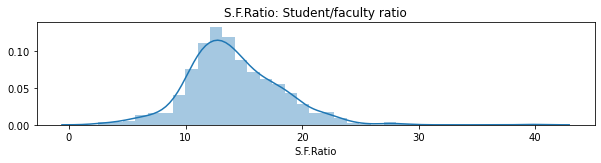

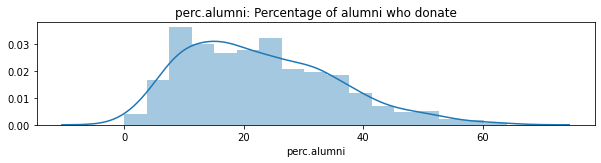

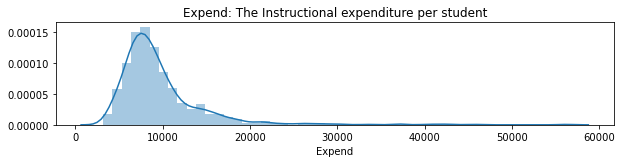

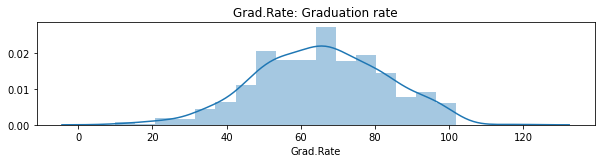

In [30]:
plt.figure(figsize=(10,20))
plt.subplot(911)
sns.distplot(df['Books']).set_title('Books: Estimated book costs for a student')

plt.figure(figsize=(10,20))
plt.subplot(912)
sns.distplot(df['PhD']).set_title('PhD: Percentage of faculties with Ph.D.’s')

plt.figure(figsize=(10,20))
plt.subplot(913)
sns.distplot(df['Terminal']).set_title('Terminal: Percentage of faculties with terminal degree')

plt.figure(figsize=(10,20))
plt.subplot(914)
sns.distplot(df['S.F.Ratio']).set_title('S.F.Ratio: Student/faculty ratio')


plt.figure(figsize=(10,20))
plt.subplot(915)
sns.distplot(df['perc.alumni']).set_title('perc.alumni: Percentage of alumni who donate')

plt.figure(figsize=(10,20))
plt.subplot(916)
sns.distplot(df['Expend']).set_title('Expend: The Instructional expenditure per student')

plt.figure(figsize=(10,20))
plt.subplot(917)
sns.distplot(df['Grad.Rate']).set_title('Grad.Rate: Graduation rate')


<Figure size 51840x103680 with 0 Axes>

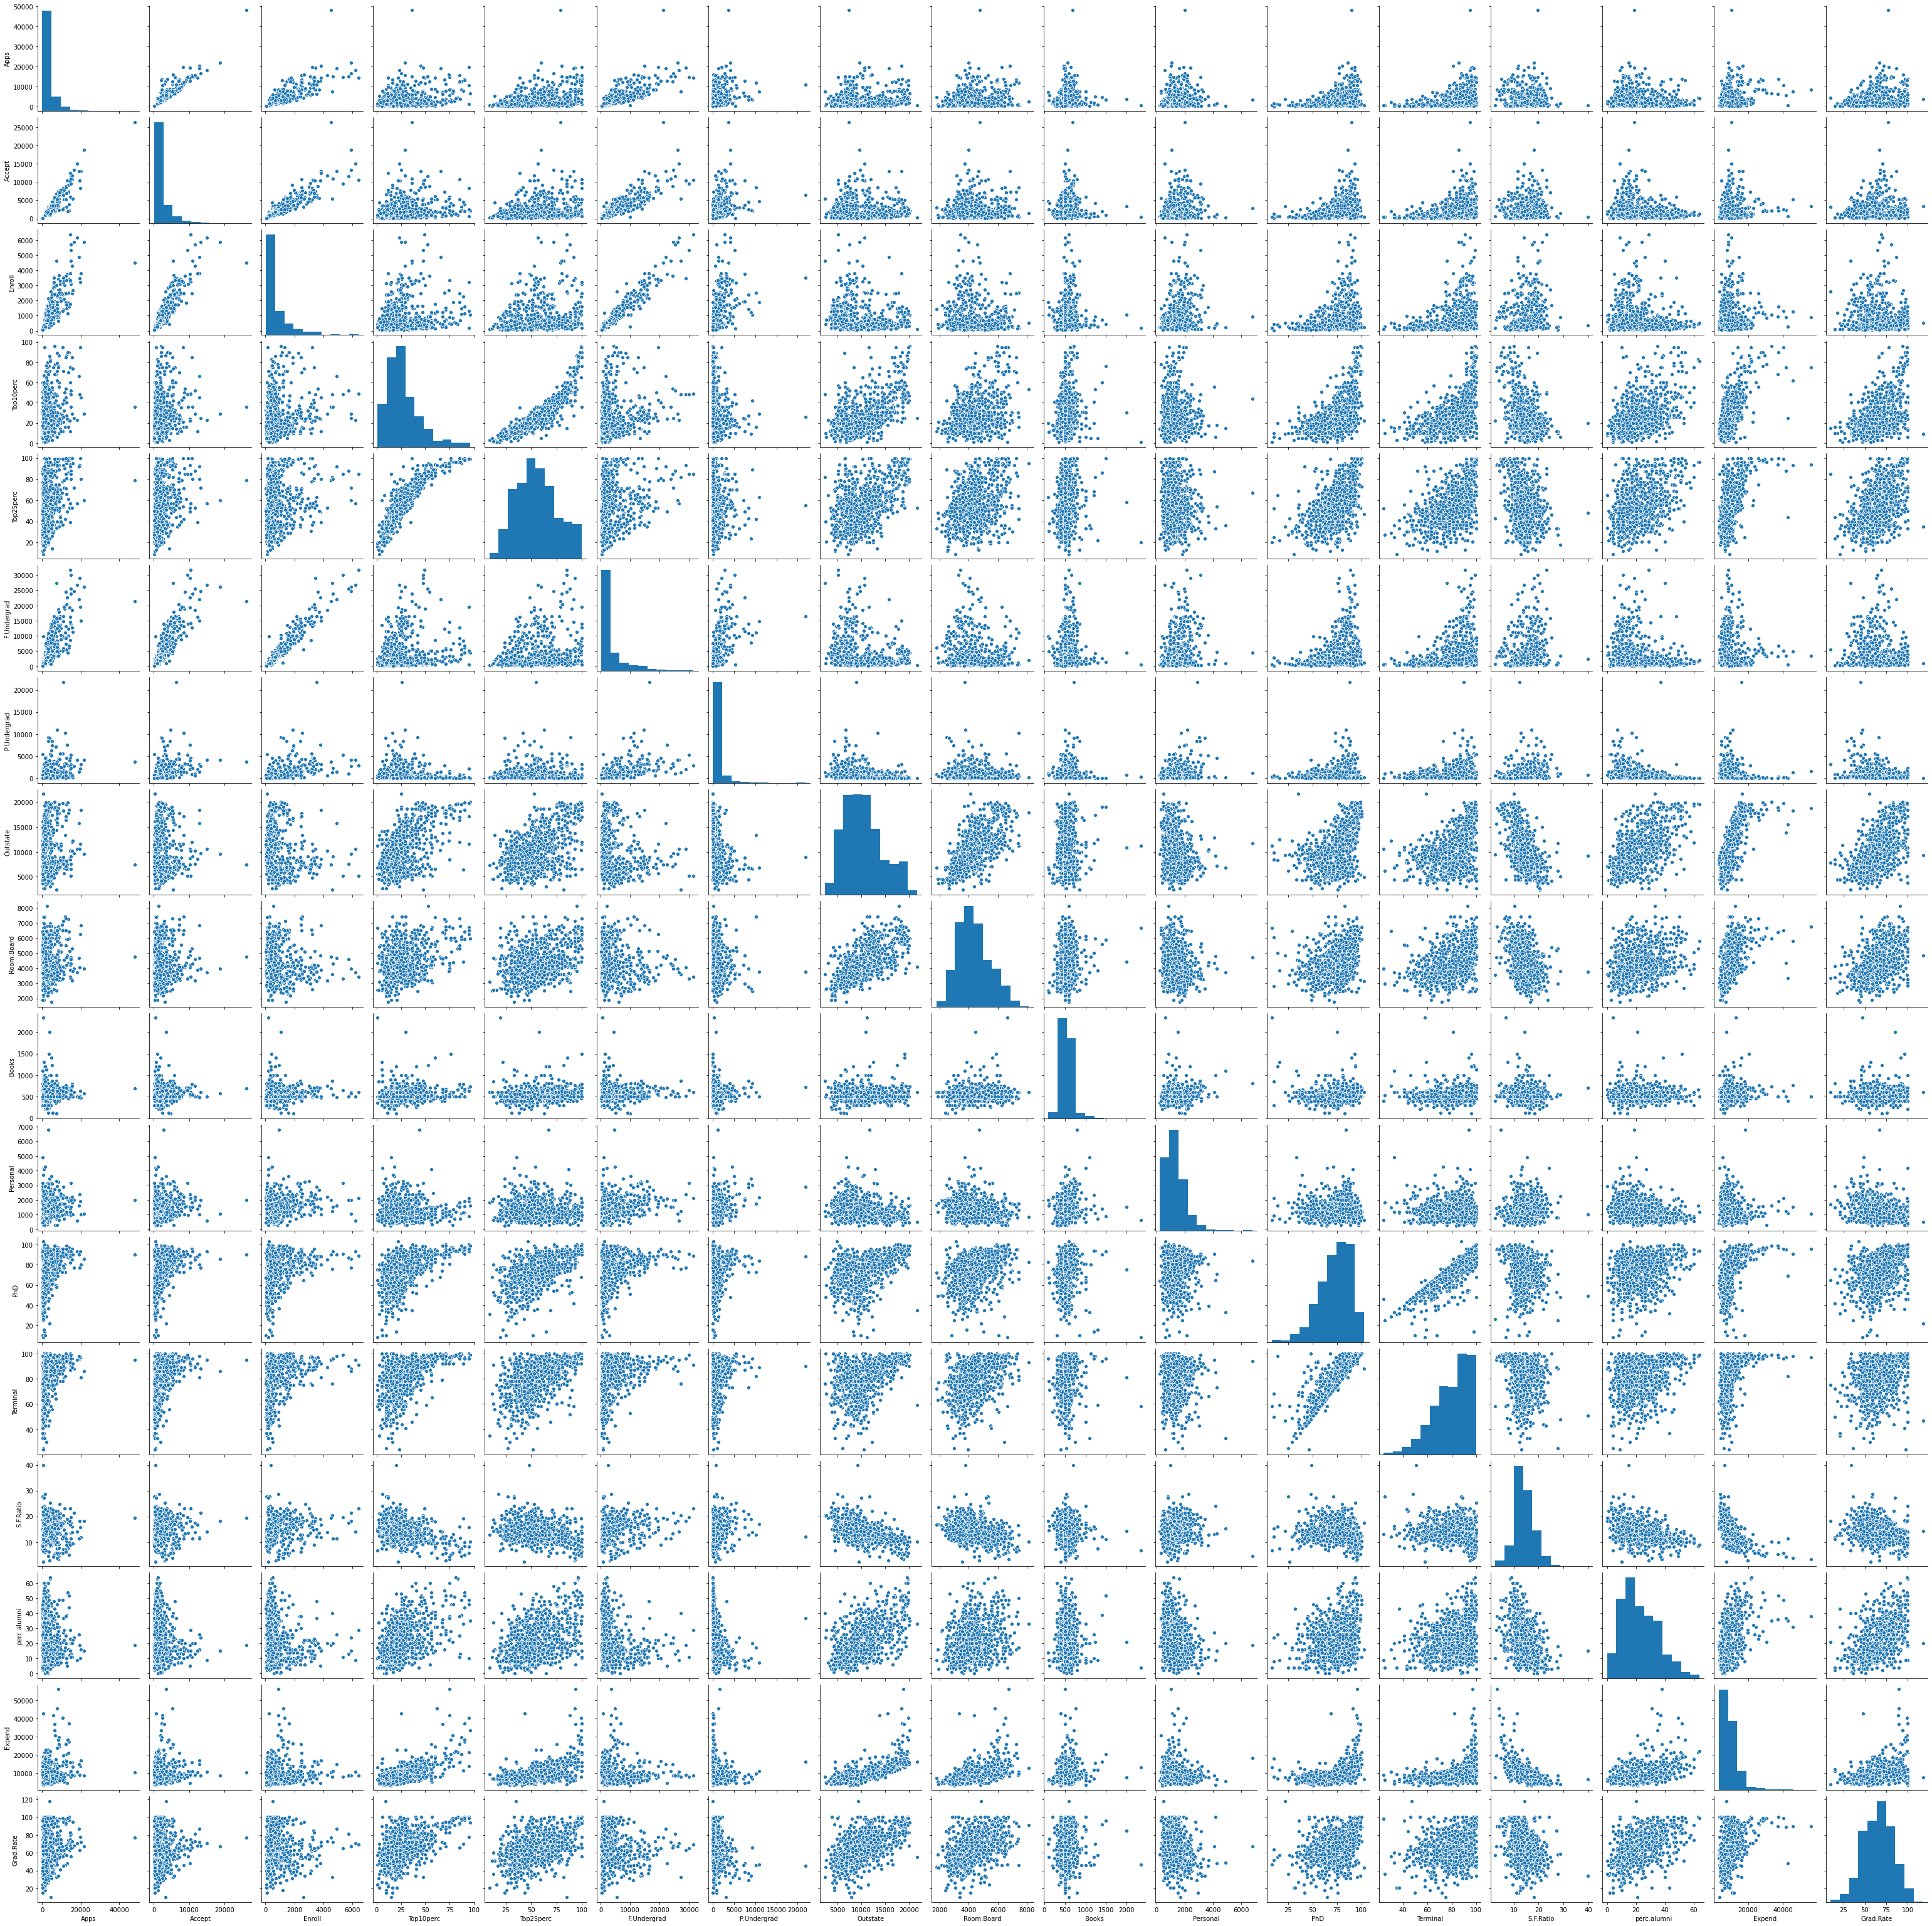

In [31]:
#Creating Bivariate Distribution  plot
plt.figure(figsize=(720,1440))
sns.pairplot(df)


<Figure size 51840x103680 with 0 Axes>

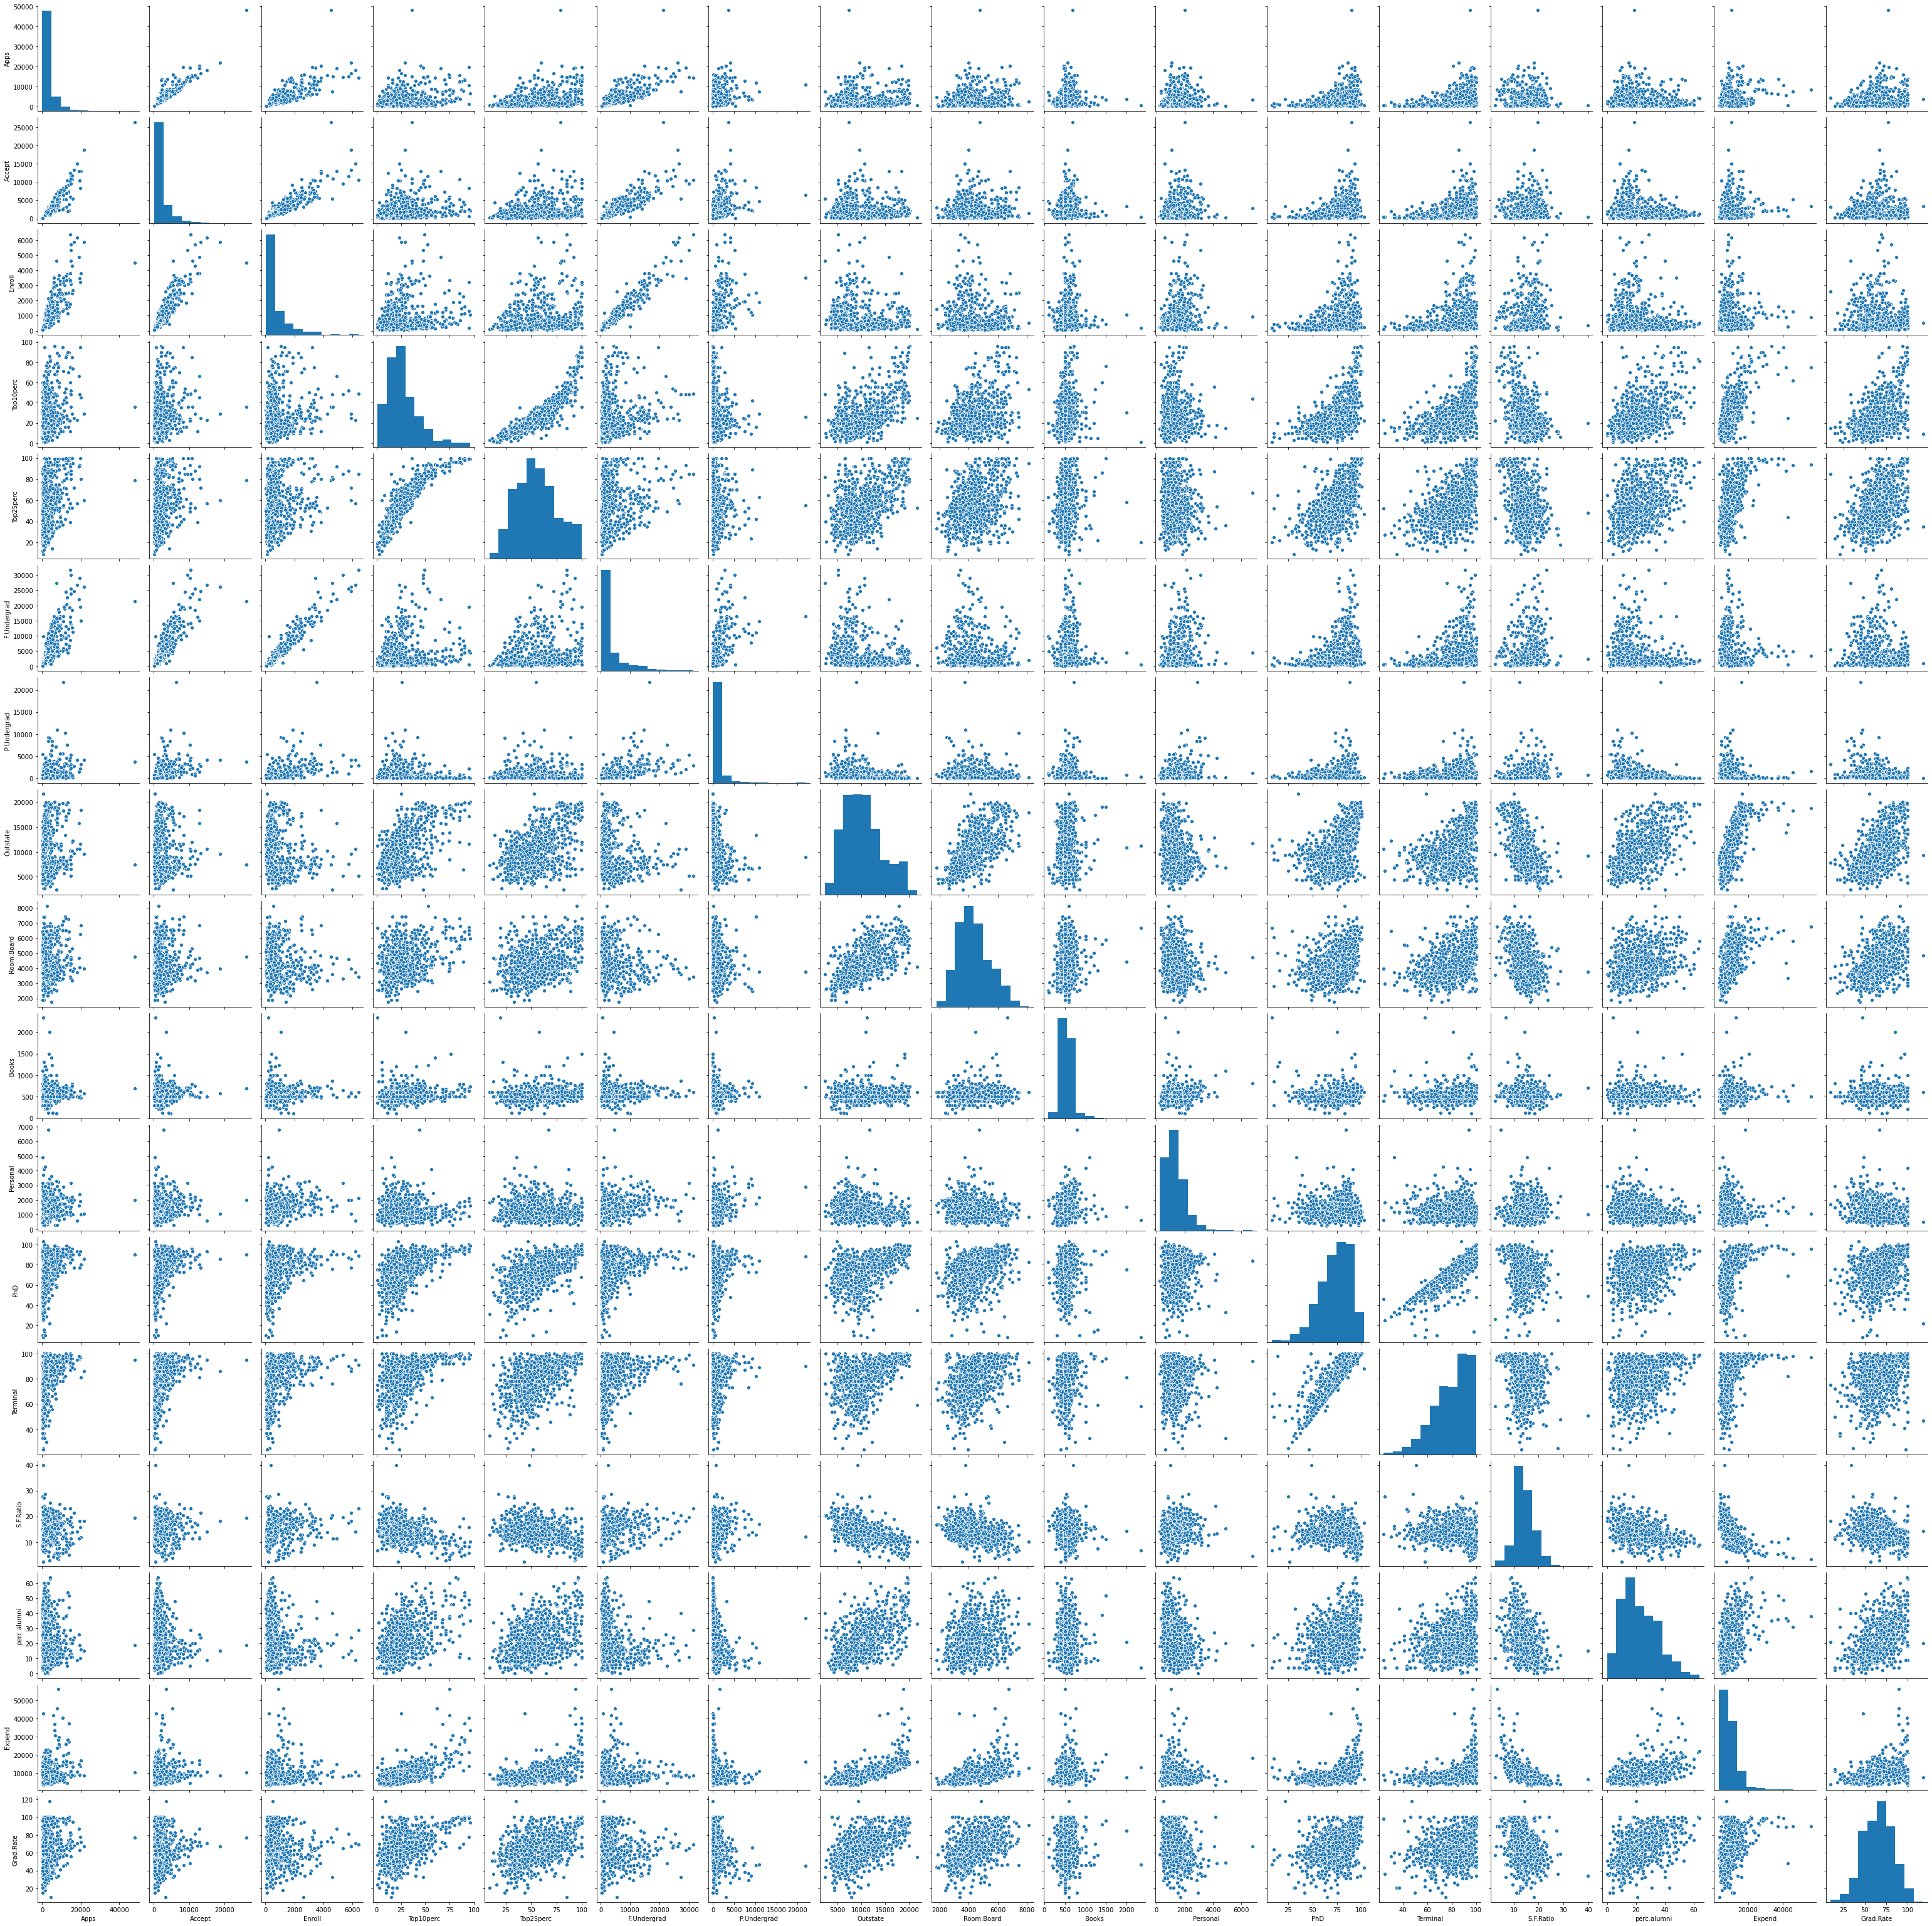

In [32]:
#Creating Bivariate Distribution  plot
plt.figure(figsize=(720,1440))
sns.pairplot(df)

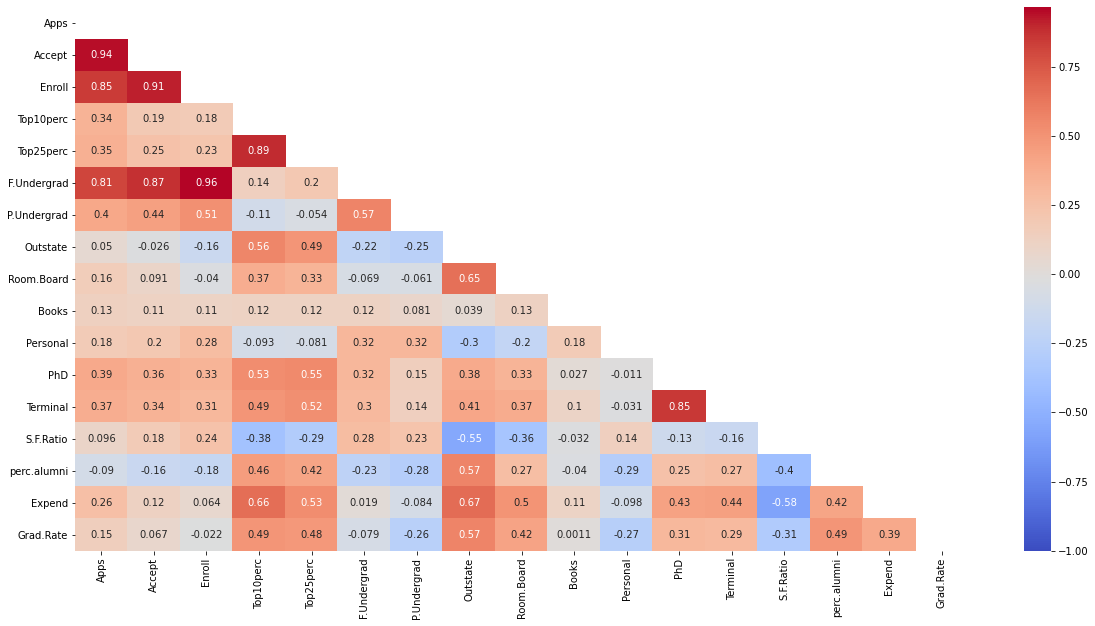

In [33]:
# Lets plot correlation Heatmap to get better visualization of behaviour of Multiple variables amongst 
# each other
df_corr=df.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

We can group all the distributions into Left Skewed,Right Skewed and Normal Distribution as follows by looking at Distribution plots.

-->Left Skewed:
Personal    
PhD            
Terminal    

--> Right Skewed:
Apps          
Accept         
Enroll         
Top10perc      
F.Undergrad    
P.Undergrad    
Books    
Expend         
S.F.Ratio     

-->Normal Distribution
Top25perc     
Outstate        
Room.Board  
perc.alumni    
Grad.Rate      



Some Insights that can be drawn from Above Heatmap.<br>

-->From the above heatmap,we can see Strong Positive Correlation between Acceptance and Number of Applications,Enrollment and No of Applications,No.of Full time Under graduates and No of Applications,<br>

-->Enrollment and No of Acceptance,No.of Full time Under graduates and No of Acceptance,
No.of part time Under graduates and No of Acceptance, Acceptance is directly proportional to PhD candidates.<br>

-->It seems Obvious that Student to Faculty ratio is inversely related to Instructional Expenditure, Expenditure is increasing when S/F ratio is decreased<br>

-->If top 10% students and top 25% students count is High in college it seems that Graduation Rate is High, PhD rate is High.
It is possible that These top students might end up by doing PhD
It is interesting if we deeper dive into relation of These students with PhD graduates.<br>

-->Due to higher percentage of outstate student, Cost of Room and boarding is also High or vice versa.<br>

-->College having Faculties with terminal degrees, seems to have higher Instructional expenditure of students<br>

-->Outstate students scored higher percentage in case of top 10 percent and 25 percent students<br>

##### 2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

**Often the variables of the data set are of different scales i.e. one variable is in Currency and other is Headcount.  in our data set Room and Boarding Fees is having values in thousands and Top 10 percent,25 Percent just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing to draw some fruitful Insights.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler function normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables and there are 17 numerical variables and one is nominal variable**

In [34]:
df1=df.copy()
df1

Names   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   1660    1232     721         23   
1                Adelphi University   2186    1924     512         16   
2                    Adrian College   1428    1097     336         22   
3               Agnes Scott College    417     349     137         60   
4         Alaska Pacific University    193     146      55         16   
..                              ...    ...     ...     ...        ...   
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 18 columns]

In [35]:
#StandardScaler() function Scales the data. and it is taken from sklearn.preprocessing library, Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
# We are scaling all the 17 variables
df1['Apps'] = std_scale.fit_transform(df[['Apps']])
df1['Accept'] = std_scale.fit_transform(df[['Accept']])
df1['Enroll'] = std_scale.fit_transform(df[['Enroll']])
df1['Top10perc']= std_scale.fit_transform(df[['Top10perc']])
df1['Top25perc']= std_scale.fit_transform(df[['Top25perc']])
df1['F.Undergrad']= std_scale.fit_transform(df[['F.Undergrad']])
df1['P.Undergrad']= std_scale.fit_transform(df[['P.Undergrad']])
df1['Outstate']= std_scale.fit_transform(df[['Outstate']])
df1['Room.Board']= std_scale.fit_transform(df[['Room.Board']])
df1['Books']= std_scale.fit_transform(df[['Books']])
df1['Personal']= std_scale.fit_transform(df[['Personal']])
df1['PhD']= std_scale.fit_transform(df[['PhD']])
df1['Terminal']= std_scale.fit_transform(df[['Terminal']])
df1['S.F.Ratio']= std_scale.fit_transform(df[['S.F.Ratio']])
df1['perc.alumni']= std_scale.fit_transform(df[['perc.alumni']])
df1['Expend']= std_scale.fit_transform(df[['Expend']])
df1['Grad.Rate ']= std_scale.fit_transform(df[['Grad.Rate']])

 We will find all the Scaled values in dataframe 1, That is df1

In [37]:
# Dataset After Scaling
df1.head()

Names      Apps    Accept    Enroll  Top10perc  \
0  Abilene Christian University -0.346882 -0.321205 -0.063509  -0.258583   
1            Adelphi University -0.210884 -0.038703 -0.288584  -0.655656   
2                Adrian College -0.406866 -0.376318 -0.478121  -0.315307   
3           Agnes Scott College -0.668261 -0.681682 -0.692427   1.840231   
4     Alaska Pacific University -0.726176 -0.764555 -0.780735  -0.655656   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
0  -0.191827    -0.168116    -0.209207 -0.746356   -0.964905 -0.602312   
1  -1.353911    -0.209788     0.244307  0.457496    1.909208  1.215880   
2  -0.292878    -0.549565    -0.497090  0.201305   -0.554317 -0.905344   
3   1.677612    -0.658079    -0.520752  0.626633    0.996791 -0.602312   
4  -0.596031    -0.711924     0.009005 -0.716508   -0.216723  1.518912   

   Personal       PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  \
0  1.270045 -0.163028 -0.115729   1.013776    -0.867574 -0.501910         60   
1  0.235515 -2.675646 -3.378176  -0.477704    -0.544572  0.166110         56   
2 -0.259582 -1.204845 -0.931341  -0.300749     0.585935 -0.177290         54   
3 -0.688173  1.185206  1.175657  -1.615274     1.151188  1.792851         59   
4  0.235515  0.204672 -0.523535  -0.553542    -1.675079  0.241803         15   

   Grad.Rate   
0   -0.318252  
1   -0.551262  
2   -0.667767  
3   -0.376504  
4   -2.939613

Text(0.5, 1.0, 'Cost of Room and board')

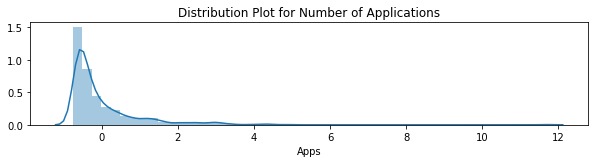

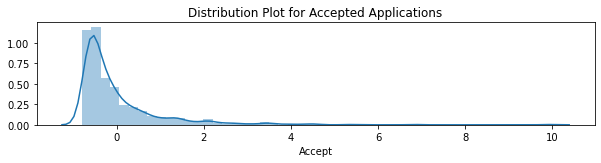

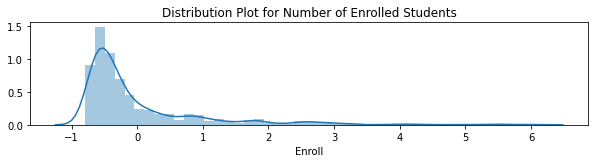

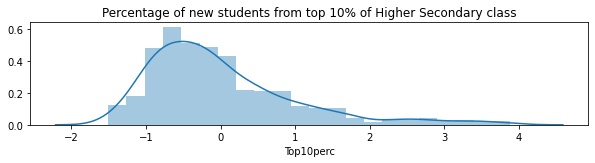

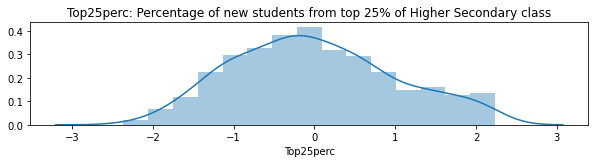

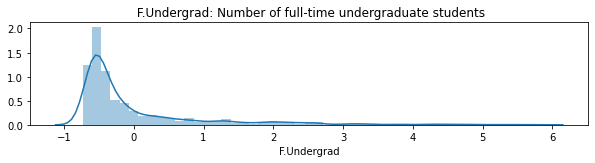

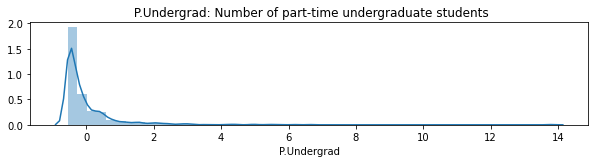

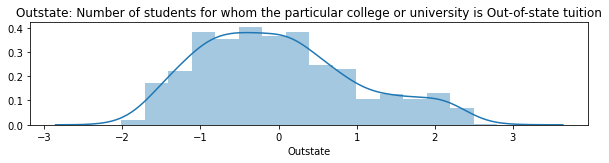

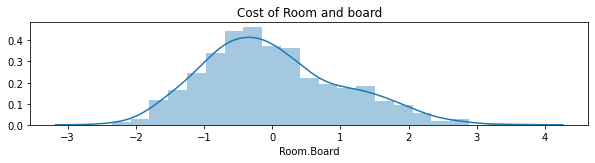

In [38]:
# Plot After Scaling
#Creating Univariate Distribution  plot
plt.figure(figsize=(10,20))
plt.subplot(911)
sns.distplot(df1['Apps']).set_title('Distribution Plot for Number of Applications')

plt.figure(figsize=(10,20))
plt.subplot(912)
sns.distplot(df1['Accept']).set_title('Distribution Plot for Accepted Applications')

plt.figure(figsize=(10,20))
plt.subplot(913)
sns.distplot(df1['Enroll']).set_title('Distribution Plot for Number of Enrolled Students')

plt.figure(figsize=(10,20))
plt.subplot(914)
sns.distplot(df1['Top10perc']).set_title('Percentage of new students from top 10% of Higher Secondary class')

plt.figure(figsize=(10,20))
plt.subplot(915)
sns.distplot(df1['Top25perc']).set_title('Top25perc: Percentage of new students from top 25% of Higher Secondary class')

plt.figure(figsize=(10,20))
plt.subplot(916)
sns.distplot(df1['F.Undergrad']).set_title(' F.Undergrad: Number of full-time undergraduate students')

plt.figure(figsize=(10,20))
plt.subplot(917)
sns.distplot(df1['P.Undergrad']).set_title(' P.Undergrad: Number of part-time undergraduate students')

plt.figure(figsize=(10,20))
plt.subplot(918)
sns.distplot(df1['Outstate']).set_title('Outstate: Number of students for whom the particular college or university is Out-of-state tuition')

plt.figure(figsize=(10,20))
plt.subplot(919)
sns.distplot(df1['Room.Board']).set_title('Cost of Room and board')




Text(0.5, 1.0, 'Grad.Rate: Graduation rate')

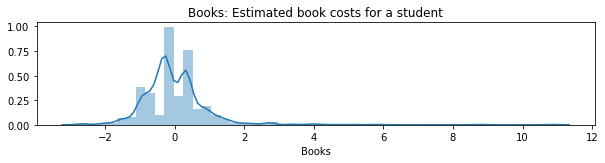

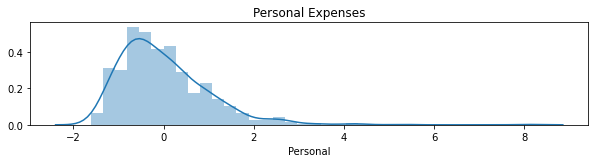

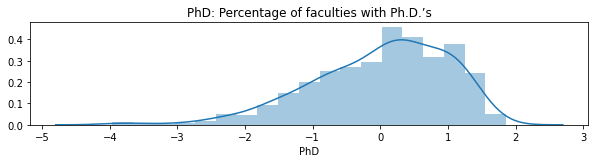

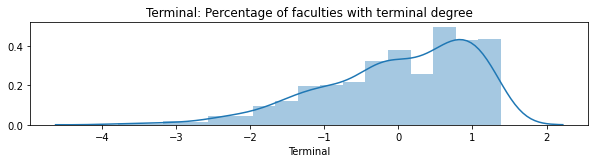

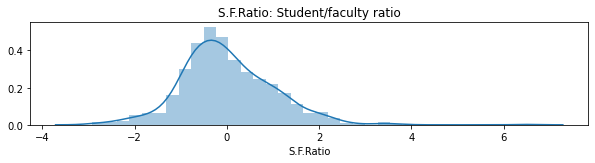

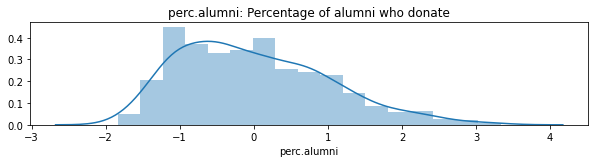

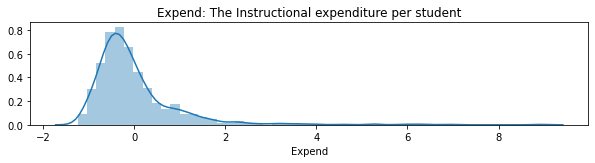

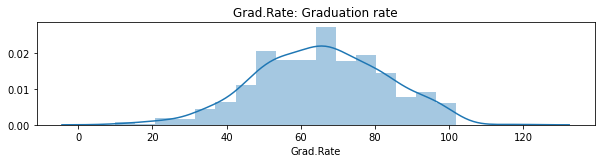

In [39]:
# Plot After Scaling
plt.figure(figsize=(10,20))
plt.subplot(911)
sns.distplot(df1['Books']).set_title('Books: Estimated book costs for a student')

# Plot After Scaling
plt.figure(figsize=(10,20))
plt.subplot(911)
sns.distplot(df1['Personal']).set_title('Personal Expenses')

plt.figure(figsize=(10,20))
plt.subplot(912)
sns.distplot(df1['PhD']).set_title('PhD: Percentage of faculties with Ph.D.’s')

plt.figure(figsize=(10,20))
plt.subplot(913)
sns.distplot(df1['Terminal']).set_title('Terminal: Percentage of faculties with terminal degree')

plt.figure(figsize=(10,20))
plt.subplot(914)
sns.distplot(df1['S.F.Ratio']).set_title('S.F.Ratio: Student/faculty ratio')


plt.figure(figsize=(10,20))
plt.subplot(915)
sns.distplot(df1['perc.alumni']).set_title('perc.alumni: Percentage of alumni who donate')

plt.figure(figsize=(10,20))
plt.subplot(916)
sns.distplot(df1['Expend']).set_title('Expend: The Instructional expenditure per student')

plt.figure(figsize=(10,20))
plt.subplot(917)
sns.distplot(df1['Grad.Rate']).set_title('Grad.Rate: Graduation rate')


So from Above Graphs we can make Inferences, And we can divide variables into Three Category as similar after Scaling.

Distributon is Right Skew:
Apps
Accept         
Enroll        
Top10perc     
F.Undergrad   
P.Undergrad   
Books   
Expend        
S.F.Ratio    

Distributon is Left Skew:
Personal    
PhD            
Terminal 

Distributon is  Normal:
Top25perc    
Outstate      
Room.Board 
perc.alumni  
Grad.Rate     

-->We can see the Distribution is same before and after the Scaling. Scaling only changes scale, by calculating Z scores, The shape of graph will remain same.

-->The skewed data needs Outlier Remove treatment. that we will do in subsequent steps.

-->Still we have not done Outlier treatment, There are High number of Outliers that Resulted into Skewness in plots.We will do outlier treatment in next steps.

##### 2.3) Comment on the comparison between covariance and the correlation matrix.

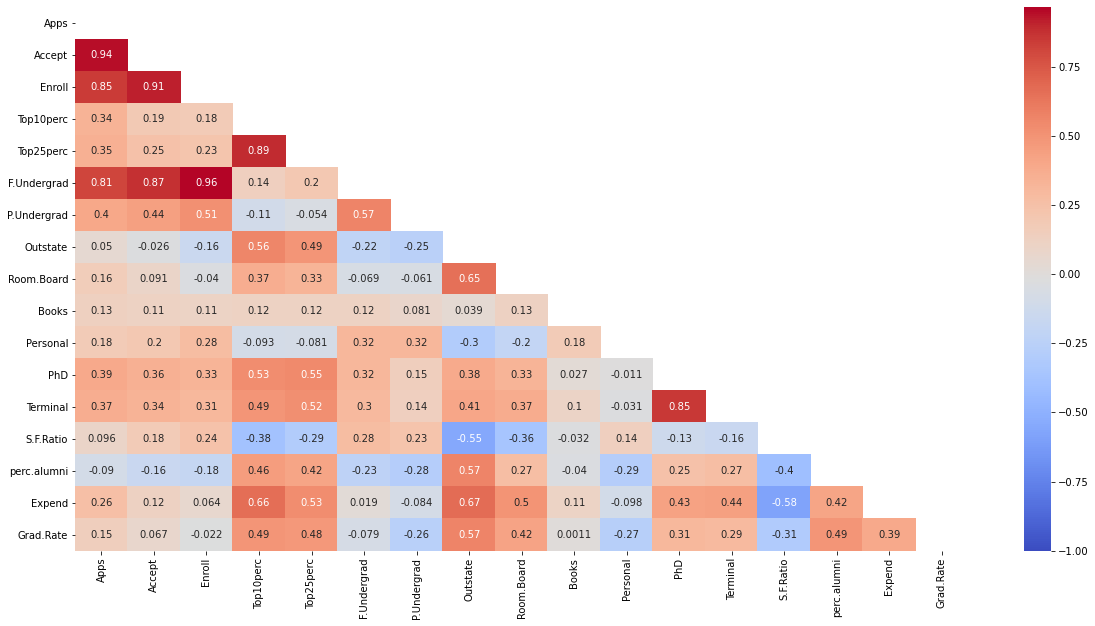

In [40]:
# Plot Correlation matrix (dataframe df, Where Outlier treatment is not done)
df_corr=df.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

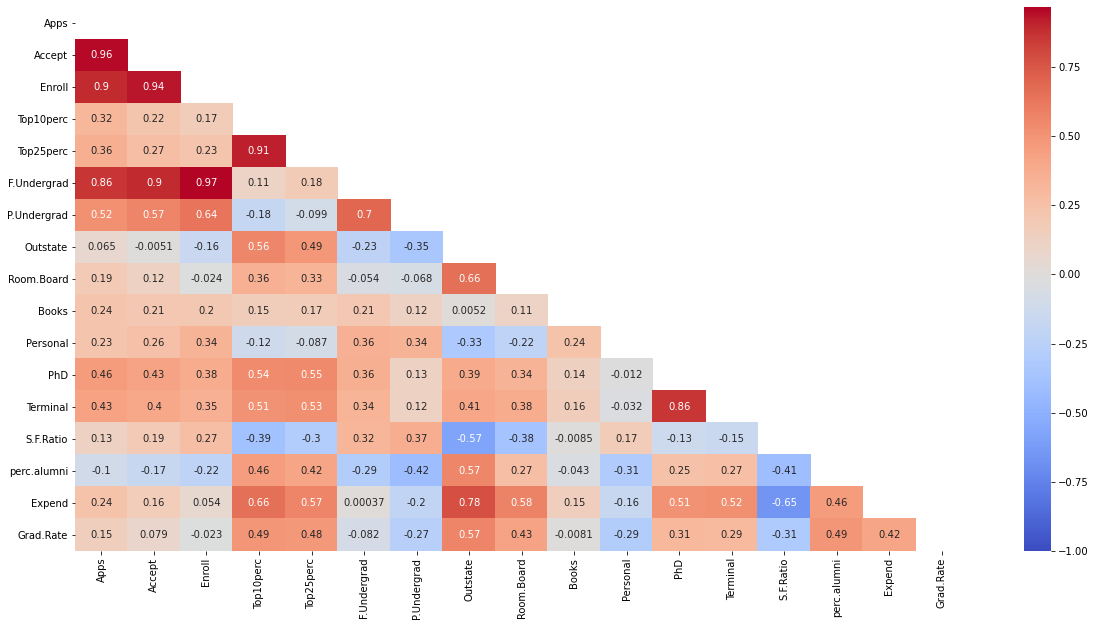

In [41]:
# Plot Correlation matrix
# Correlation matrix for Data Without Outliers(Outlier treatment is done on DataFrame df4)
df4_corr=df4.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(df4_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

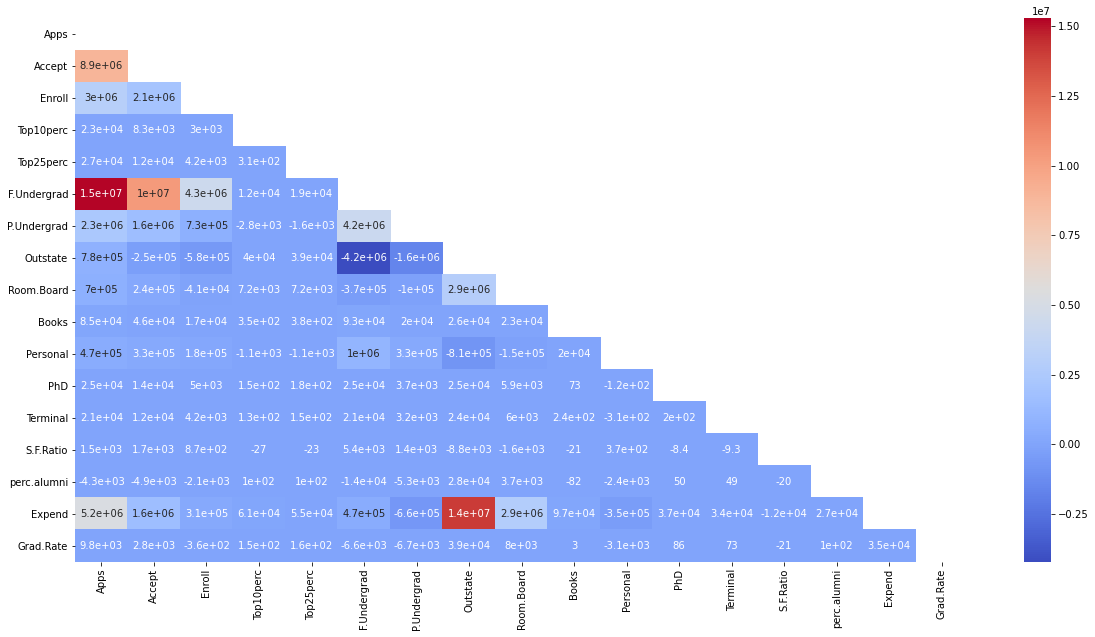

In [42]:
# Plot Covarience matrix (dataframe df, Where Outlier treatment is not done)
df_cov=df.cov()

mask = np.zeros_like(df_cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(df.cov(),
            cmap='coolwarm',
            annot=True,
            mask = mask);


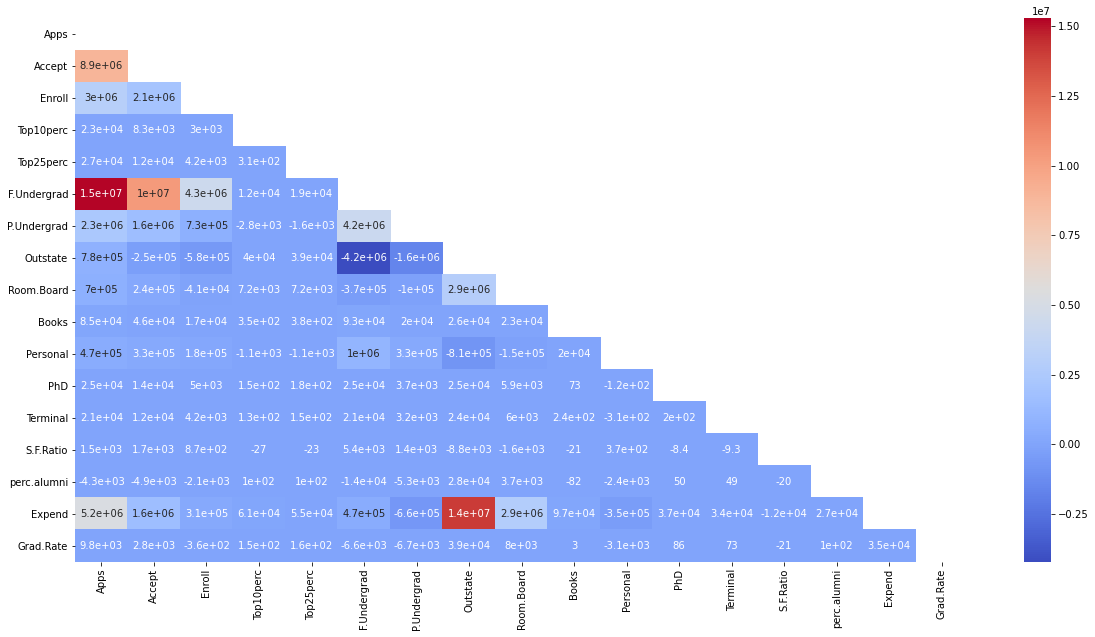

In [43]:
# Plot Covarience matrix
# Covarience matrix for Data Without Outliers
df4_cov=df4.cov()

mask = np.zeros_like(df4_cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(df.cov(),
            cmap='coolwarm',
            annot=True,
            mask = mask);

If we Comapare Two Correlation matrix, One with Outliers and other without outliers,
We can say that these both Correlation matrix have little changes and are almost equivalent.<br>

Same goes with Covariance Matrix,One with Outliers and other without outliers,
We can say that these both covariance matrix have no changes and are equivalent.<br>

Covarience tells us, is there any dependence between two variables,metrics such as "To what extent variables change together". It does not tell us about dependency between variables.<br>

while Correlation gives us Strength and Direction as well. That is One variable is Increasing then other is Increasing or decreasing.additionally it tell us the strength of bond between two variables.<br>

Covariance and Correlation have same analogy as Variance and Std deviation. We have to divide Co-variance by Std deviation,then we get Correlation.<br>




##### 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.


We will Approach this Question by two plots,
One is distribution plot (to see the distriution before and after scaling)
and Boxplot(Which will give us idea about outliers)

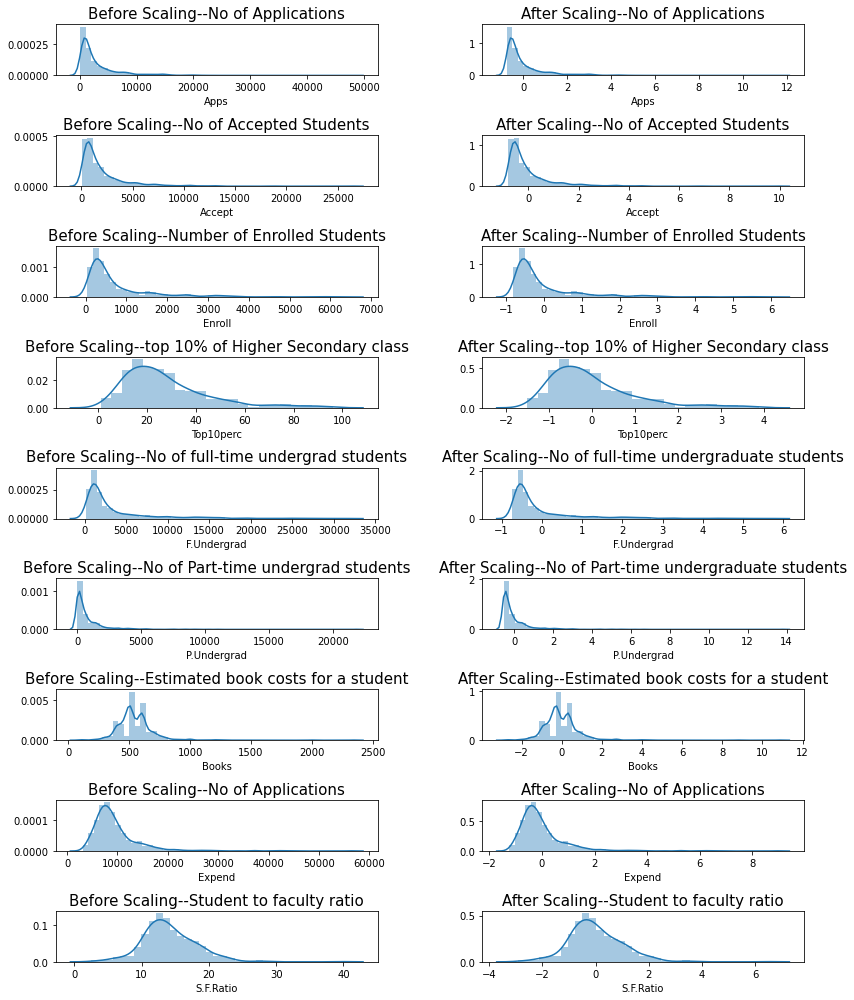

In [44]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['Apps'] , ax=axes[0][0])
a.set_title("Before Scaling--No of Applications",fontsize=15)
a = sns.distplot(df1['Apps'] , ax=axes[0][1])
a.set_title("After Scaling--No of Applications",fontsize=15)


a = sns.distplot(df['Accept'] , ax=axes[1][0])
a.set_title("Before Scaling--No of Accepted Students",fontsize=15)
a = sns.distplot(df1['Accept'] , ax=axes[1][1])
a.set_title("After Scaling--No of Accepted Students",fontsize=15)


a = sns.distplot(df['Enroll'] , ax=axes[2][0])
a.set_title("Before Scaling--Number of Enrolled Students",fontsize=15)
a = sns.distplot(df1['Enroll'] , ax=axes[2][1])
a.set_title("After Scaling--Number of Enrolled Students",fontsize=15)

a = sns.distplot(df['Top10perc'] , ax=axes[3][0])
a.set_title("Before Scaling--top 10% of Higher Secondary class",fontsize=15)
a = sns.distplot(df1['Top10perc'] , ax=axes[3][1])
a.set_title("After Scaling--top 10% of Higher Secondary class",fontsize=15)

a = sns.distplot(df['F.Undergrad'] , ax=axes[4][0])
a.set_title("Before Scaling--No of full-time undergrad students",fontsize=15)
a = sns.distplot(df1['F.Undergrad'] , ax=axes[4][1])
a.set_title("After Scaling--No of full-time undergraduate students",fontsize=15)

a = sns.distplot(df['P.Undergrad'] , ax=axes[5][0])
a.set_title("Before Scaling--No of Part-time undergrad students",fontsize=15)
a = sns.distplot(df1['P.Undergrad'] , ax=axes[5][1])
a.set_title("After Scaling--No of Part-time undergraduate students",fontsize=15)

a = sns.distplot(df['Books'] , ax=axes[6][0])
a.set_title("Before Scaling--Estimated book costs for a student",fontsize=15)
a = sns.distplot(df1['Books'] , ax=axes[6][1])
a.set_title("After Scaling--Estimated book costs for a student",fontsize=15)

a = sns.distplot(df['Expend'] , ax=axes[7][0])
a.set_title("Before Scaling--No of Applications",fontsize=15)
a = sns.distplot(df1['Expend'] , ax=axes[7][1])
a.set_title("After Scaling--No of Applications",fontsize=15)

a = sns.distplot(df['S.F.Ratio'] , ax=axes[8][0])
a.set_title("Before Scaling--Student to faculty ratio",fontsize=15)
a = sns.distplot(df1['S.F.Ratio'] , ax=axes[8][1])
a.set_title("After Scaling--Student to faculty ratio",fontsize=15)

plt.tight_layout()
plt.show()

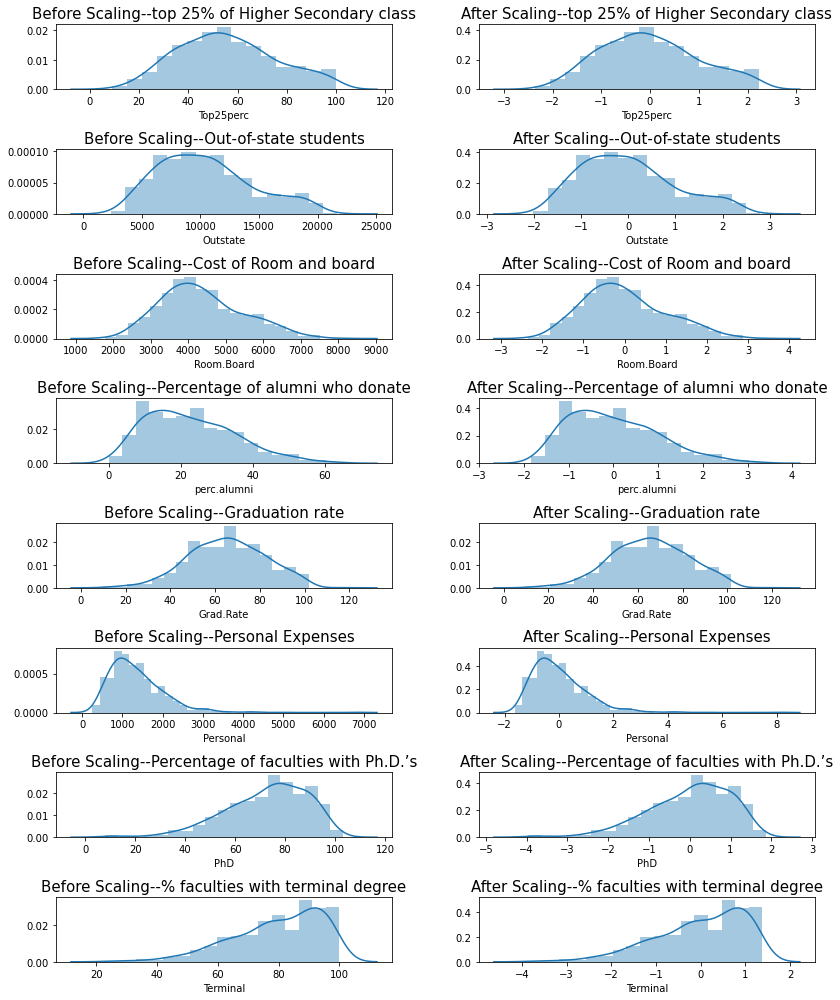

In [45]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['Top25perc'] , ax=axes[0][0])
a.set_title("Before Scaling--top 25% of Higher Secondary class",fontsize=15)
a = sns.distplot(df1['Top25perc'] , ax=axes[0][1])
a.set_title("After Scaling--top 25% of Higher Secondary class",fontsize=15)


a = sns.distplot(df['Outstate'] , ax=axes[1][0])
a.set_title("Before Scaling--Out-of-state students",fontsize=15)
a = sns.distplot(df1['Outstate'] , ax=axes[1][1])
a.set_title("After Scaling--Out-of-state students",fontsize=15)


a = sns.distplot(df['Room.Board'] , ax=axes[2][0])
a.set_title("Before Scaling--Cost of Room and board",fontsize=15)
a = sns.distplot(df1['Room.Board'] , ax=axes[2][1])
a.set_title("After Scaling--Cost of Room and board",fontsize=15)

a = sns.distplot(df['perc.alumni'] , ax=axes[3][0])
a.set_title("Before Scaling--Percentage of alumni who donate",fontsize=15)
a = sns.distplot(df1['perc.alumni'] , ax=axes[3][1])
a.set_title("After Scaling--Percentage of alumni who donate",fontsize=15)

a = sns.distplot(df['Grad.Rate'] , ax=axes[4][0])
a.set_title("Before Scaling--Graduation rate",fontsize=15)
a = sns.distplot(df1['Grad.Rate'] , ax=axes[4][1])
a.set_title("After Scaling--Graduation rate",fontsize=15)

a = sns.distplot(df['Personal'] , ax=axes[5][0])
a.set_title("Before Scaling--Personal Expenses",fontsize=15)
a = sns.distplot(df1['Personal'] , ax=axes[5][1])
a.set_title("After Scaling--Personal Expenses",fontsize=15)

a = sns.distplot(df['PhD'] , ax=axes[6][0])
a.set_title("Before Scaling--Percentage of faculties with Ph.D.’s",fontsize=15)
a = sns.distplot(df1['PhD'] , ax=axes[6][1])
a.set_title("After Scaling--Percentage of faculties with Ph.D.’s",fontsize=15)

a = sns.distplot(df['Terminal'] , ax=axes[7][0])
a.set_title("Before Scaling--% faculties with terminal degree",fontsize=15)
a = sns.distplot(df1['Terminal'] , ax=axes[7][1])
a.set_title("After Scaling--% faculties with terminal degree",fontsize=15)



plt.tight_layout()
plt.show()


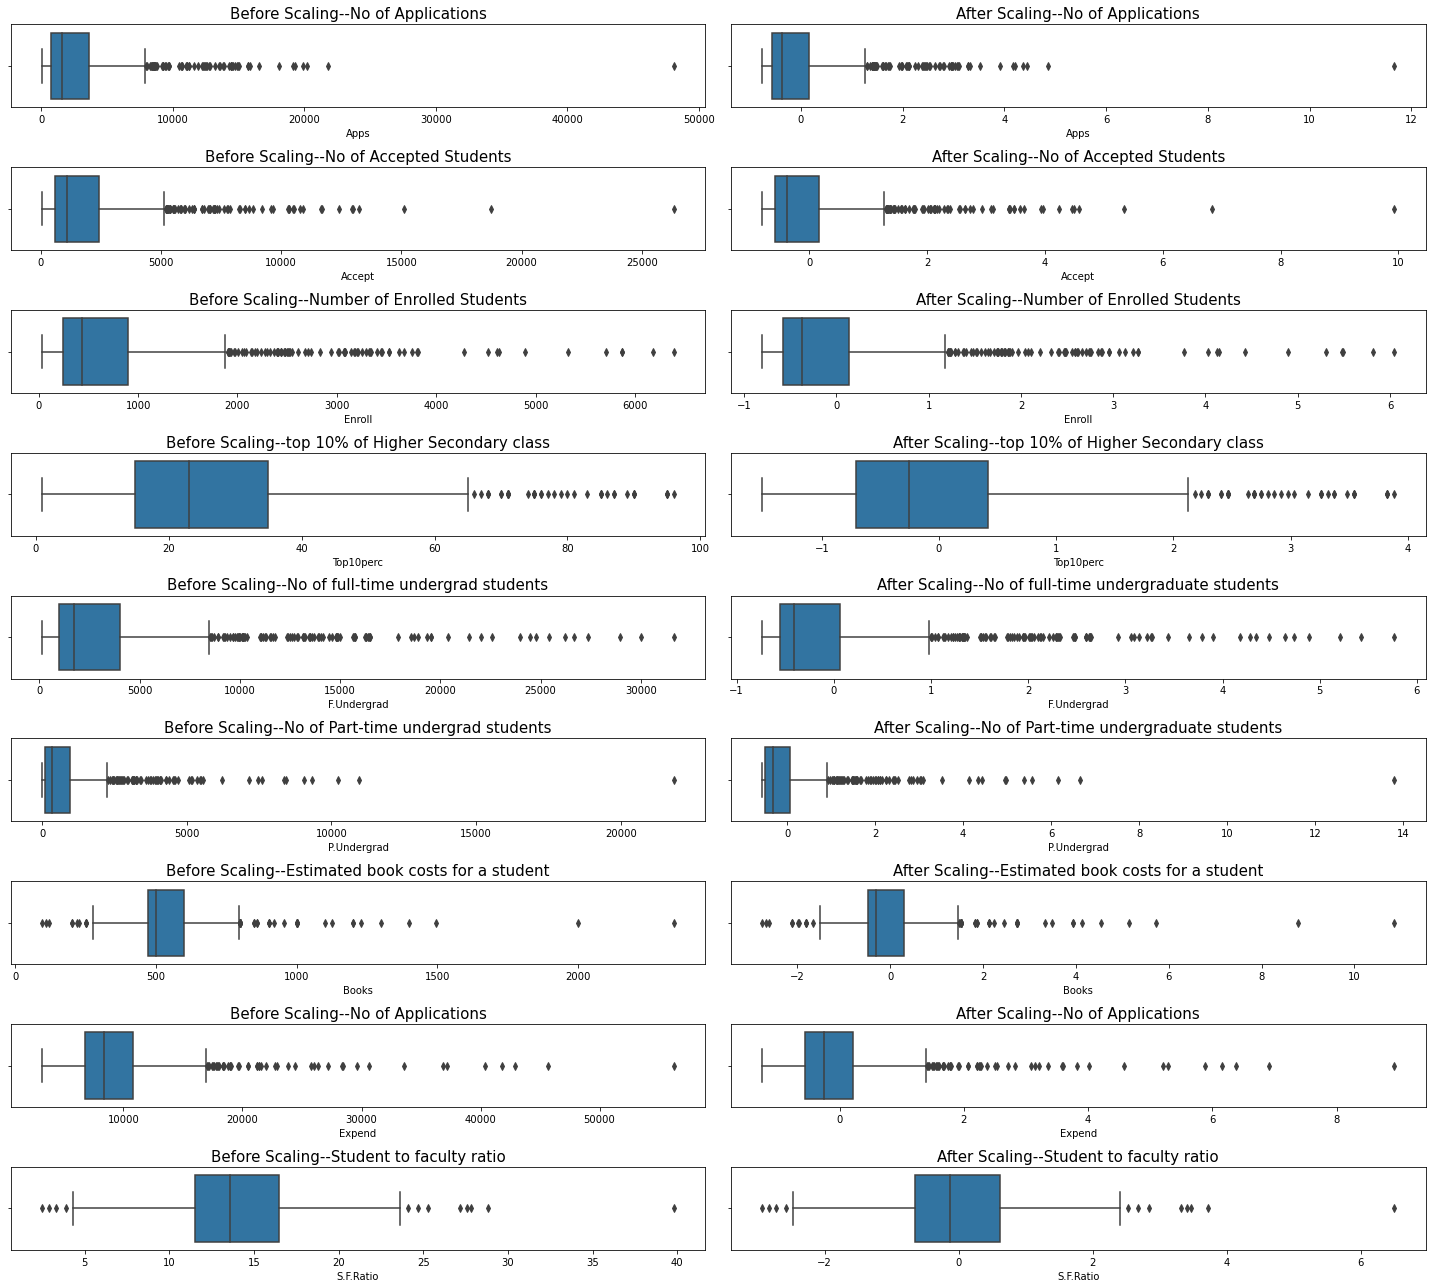

In [46]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(20, 18)

a = sns.boxplot(df['Apps'] , ax=axes[0][0])
a.set_title("Before Scaling--No of Applications",fontsize=15)
a = sns.boxplot(df1['Apps'] , ax=axes[0][1])
a.set_title("After Scaling--No of Applications",fontsize=15)


a = sns.boxplot(df['Accept'] , ax=axes[1][0])
a.set_title("Before Scaling--No of Accepted Students",fontsize=15)
a = sns.boxplot(df1['Accept'] , ax=axes[1][1])
a.set_title("After Scaling--No of Accepted Students",fontsize=15)


a = sns.boxplot(df['Enroll'] , ax=axes[2][0])
a.set_title("Before Scaling--Number of Enrolled Students",fontsize=15)
a = sns.boxplot(df1['Enroll'] , ax=axes[2][1])
a.set_title("After Scaling--Number of Enrolled Students",fontsize=15)

a = sns.boxplot(df['Top10perc'] , ax=axes[3][0])
a.set_title("Before Scaling--top 10% of Higher Secondary class",fontsize=15)
a = sns.boxplot(df1['Top10perc'] , ax=axes[3][1])
a.set_title("After Scaling--top 10% of Higher Secondary class",fontsize=15)

a = sns.boxplot(df['F.Undergrad'] , ax=axes[4][0])
a.set_title("Before Scaling--No of full-time undergrad students",fontsize=15)
a = sns.boxplot(df1['F.Undergrad'] , ax=axes[4][1])
a.set_title("After Scaling--No of full-time undergraduate students",fontsize=15)

a = sns.boxplot(df['P.Undergrad'] , ax=axes[5][0])
a.set_title("Before Scaling--No of Part-time undergrad students",fontsize=15)
a = sns.boxplot(df1['P.Undergrad'] , ax=axes[5][1])
a.set_title("After Scaling--No of Part-time undergraduate students",fontsize=15)

a = sns.boxplot(df['Books'] , ax=axes[6][0])
a.set_title("Before Scaling--Estimated book costs for a student",fontsize=15)
a = sns.boxplot(df1['Books'] , ax=axes[6][1])
a.set_title("After Scaling--Estimated book costs for a student",fontsize=15)

a = sns.boxplot(df['Expend'] , ax=axes[7][0])
a.set_title("Before Scaling--No of Applications",fontsize=15)
a = sns.boxplot(df1['Expend'] , ax=axes[7][1])
a.set_title("After Scaling--No of Applications",fontsize=15)

a = sns.boxplot(df['S.F.Ratio'] , ax=axes[8][0])
a.set_title("Before Scaling--Student to faculty ratio",fontsize=15)
a = sns.boxplot(df1['S.F.Ratio'] , ax=axes[8][1])
a.set_title("After Scaling--Student to faculty ratio",fontsize=15)

plt.tight_layout()
plt.show()

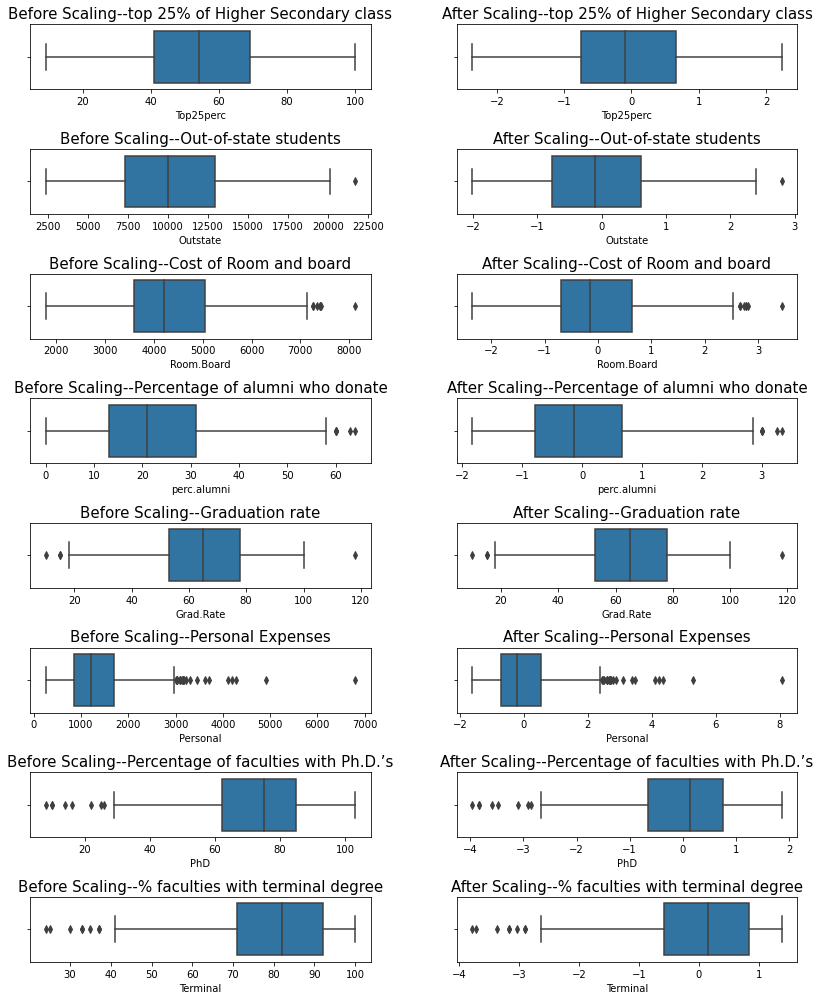

In [47]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(12, 14)

a = sns.boxplot(df['Top25perc'] , ax=axes[0][0])
a.set_title("Before Scaling--top 25% of Higher Secondary class",fontsize=15)
a = sns.boxplot(df1['Top25perc'] , ax=axes[0][1])
a.set_title("After Scaling--top 25% of Higher Secondary class",fontsize=15)


a = sns.boxplot(df['Outstate'] , ax=axes[1][0])
a.set_title("Before Scaling--Out-of-state students",fontsize=15)
a = sns.boxplot(df1['Outstate'] , ax=axes[1][1])
a.set_title("After Scaling--Out-of-state students",fontsize=15)


a = sns.boxplot(df['Room.Board'] , ax=axes[2][0])
a.set_title("Before Scaling--Cost of Room and board",fontsize=15)
a = sns.boxplot(df1['Room.Board'] , ax=axes[2][1])
a.set_title("After Scaling--Cost of Room and board",fontsize=15)

a = sns.boxplot(df['perc.alumni'] , ax=axes[3][0])
a.set_title("Before Scaling--Percentage of alumni who donate",fontsize=15)
a = sns.boxplot(df1['perc.alumni'] , ax=axes[3][1])
a.set_title("After Scaling--Percentage of alumni who donate",fontsize=15)

a = sns.boxplot(df['Grad.Rate'] , ax=axes[4][0])
a.set_title("Before Scaling--Graduation rate",fontsize=15)
a = sns.boxplot(df1['Grad.Rate'] , ax=axes[4][1])
a.set_title("After Scaling--Graduation rate",fontsize=15)

a = sns.boxplot(df['Personal'] , ax=axes[5][0])
a.set_title("Before Scaling--Personal Expenses",fontsize=15)
a = sns.boxplot(df1['Personal'] , ax=axes[5][1])
a.set_title("After Scaling--Personal Expenses",fontsize=15)

a = sns.boxplot(df['PhD'] , ax=axes[6][0])
a.set_title("Before Scaling--Percentage of faculties with Ph.D.’s",fontsize=15)
a = sns.boxplot(df1['PhD'] , ax=axes[6][1])
a.set_title("After Scaling--Percentage of faculties with Ph.D.’s",fontsize=15)

a = sns.boxplot(df['Terminal'] , ax=axes[7][0])
a.set_title("Before Scaling--% faculties with terminal degree",fontsize=15)
a = sns.boxplot(df1['Terminal'] , ax=axes[7][1])
a.set_title("After Scaling--% faculties with terminal degree",fontsize=15)



plt.tight_layout()
plt.show()


###### So, as you can see the after scaling also, the outliers remains outliers. Only the range is changed.
###### By scaling your variables, you can help compare different variables on equal footing.
######  Scaling will change the range only, and in all the cases outliers will remain outliers after normalisation. 
###### All distplot are also same, Note we are just scaling variables not Normalizing. Hence shape will be same after and before Scaling.


##### 2.5) Build the covariance matrix, eigenvalues, and eigenvector.

In [48]:
# We will first take copy of original data and remove column Names, 
# as it has String value not continous numerical values
# Remove Names Column and Copy it to New dataframe.No changes in df and df1
df5=df4.copy()
df5.drop('Names', inplace=True, axis=1)
df5.head()


Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0       52.0       2885.0        537.0   
1  2186.0  1924.0   512.0       16.0       29.0       2683.0       1227.0   
2  1428.0  1097.0   336.0       22.0       50.0       1036.0         99.0   
3   417.0   349.0   137.0       60.0       89.0        510.0         63.0   
4   193.0   146.0    55.0       16.0       44.0        249.0        869.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0      7440      3300.0  450.0    2200.0  70.0      78.0       18.1   
1     12280      6450.0  750.0    1500.0  29.0      39.5       12.2   
2     11250      3750.0  400.0    1165.0  53.0      66.0       12.9   
3     12960      5450.0  450.0     875.0  92.0      97.0        7.7   
4      7560      4120.0  795.0    1500.0  76.0      72.0       11.9   

   perc.alumni   Expend  Grad.Rate  
0         12.0   7041.0       60.0  
1         16.0  10527.0       56.0  
2         30.0   8735.0       54.0  
3         37.0  16948.5       59.0  
4          2.0  10922.0       15.5

In [49]:
# All variables must be on same scale.hence will do Standardization
from scipy.stats import zscore
data_new=df5.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746356   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457496    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201305   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626633    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716508   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

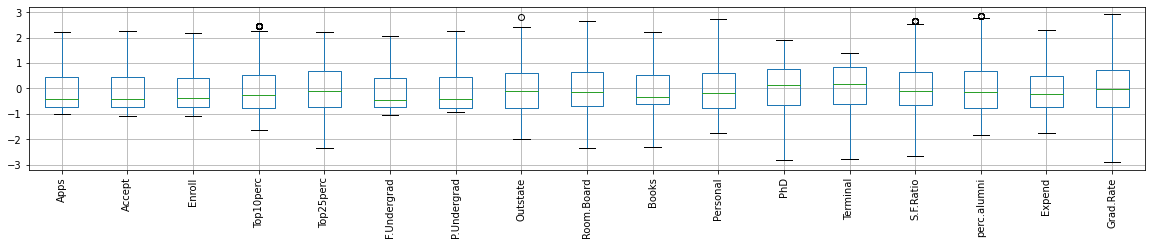

In [50]:
data_new.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

##### Covariance matrix

In [51]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.52998927e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.11694701e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55918498e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62687647e-

##### Eigen Values and Eigen Vectors

In [52]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.66219907 4.89471273 1.12636392 1.00402092 0.87219858 0.76575542
 0.58488145 0.54450163 0.42352463 0.38105823 0.24726431 0.02239369
 0.03789706 0.14726488 0.13433384 0.09884696 0.07468991]


Eigen Vectors 
 %s [[-2.62229954e-01  3.14086037e-01  8.09955831e-02 -9.88928777e-02
  -2.19853756e-01  2.20227040e-03 -2.83402150e-02 -8.99539206e-02
   1.30529963e-01 -1.56399024e-01 -8.64339039e-02  1.82176767e-01
  -5.99192409e-01  8.95731261e-02  8.93620797e-02  5.49345180e-01
   5.60461479e-03]
 [-2.30624175e-01  3.44579410e-01  1.07628639e-01 -1.18256183e-01
  -1.89591977e-01 -1.65097581e-02 -1.29185319e-02 -1.37615449e-01
   1.42229385e-01 -1.49176136e-01 -4.27692108e-02 -3.91053967e-01
   6.61475193e-01  1.58543942e-01  4.45021452e-02  2.91678683e-01
   1.44515496e-02]
 [-1.89344833e-01  3.82775616e-01  8.55219277e-02 -9.42087583e-03
  -1.62328025e-01 -6.80760682e-02 -1.52041732e-02 -1.44235243e-01
   5.08457135e-02 -6.48716395e-02 -4.38253321e-02  7.16683738e-01
   2

##### 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

PCA technique is drawing straight, explanatory lines through data.Which covers Maximum variance.

Each straight line represents a “principal component,” or a relationship between an independent and dependent variable. While there are as many principal components as there are dimensions in the data, PCA’s role is to prioritize them.

The first principal component bisects a scatterplot with a straight line in a way that explains the most variance; that is, it follows the longest dimension of the data. (This happens to coincide with the least error, as expressed by the red lines…)

Second component tries to fix the error of First Component, then Third willl try to fix errors caused by First and second Principal Component.It just goes on.

Eigen value is giving Strength/Magnitude of Line while Eigen vector gives us Direction. 
Eigen vector Represents Principal Component.

So General form of Conversion is

Current value of Covariance Matrix * Corresponding Eigen Vector Matrix = Eigen Valus * Target matrix produced by Mapping small projections on New line where most of variables Covered.

we can write Below equation based on this,

Covariance Matrix(A) * Eigen Vector of Matrix(u) 
= Scaled or Transformed version of Matrix(Which has same direction of Unscaled Matrix)

We can Write Above Equation in Simple Format as

##### A * u = Lambda * u

This 'Lambda' is scaled Factor Which is Nothing But Eigen value. 

Basically lambda is Scaled multiplier of Matrix A by using Eigen Vector v, The Scale is Changed 
For the First Principal Component, [5.66219907] is Eigen Value and 
Eigen Vector is V[:,0]

In below module we can get Highest Cumulative variance as 33%, which shows First PC is Covering 33% data variance. 





For First Principal Component let's find out Eigen Vector and its Eigen Value form that is lambda * Eigen Vector

In [73]:
u=eig_vecs[:,0]
u

array([-0.26222995, -0.23062417, -0.18934483, -0.33887061, -0.33469392,
       -0.16336395, -0.02253702, -0.28341889, -0.2441651 , -0.09673362,
        0.03519807, -0.32641762, -0.32312587,  0.16311751, -0.1865775 ,
       -0.32894891, -0.23879622])

In [70]:
Lambda = eig_vals[0]
Lambda

5.662199066267323

In [71]:
Lambda * u

array([-1.4847982 , -1.30583999, -1.07210814, -1.91875286, -1.89510363,
       -0.92499922, -0.12760909, -1.6047742 , -1.3825114 , -0.54772501,
        0.19929849, -1.84824155, -1.82960297,  0.92360383, -1.05643895,
       -1.86257424, -1.35211174])

In [85]:
A = cov_matrix
np.dot(A,u)

array([-1.4847982 , -1.30583999, -1.07210814, -1.91875286, -1.89510363,
       -0.92499922, -0.12760909, -1.6047742 , -1.3825114 , -0.54772501,
        0.19929849, -1.84824155, -1.82960297,  0.92360383, -1.05643895,
       -1.86257424, -1.35211174])

Above is the First Principal Component which is Scaled Version of Matrix applied to Eigen vector. We can see transformation as
A.u = lambda * u


##### 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [57]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26418711  62.01955902  68.63670192  74.53510631  79.65908311
  84.15772951  87.59378071  90.79260926  93.28072429  95.51935846
  96.97198249  97.83713159  98.62631364  99.20701804  99.64580501
  99.86844197 100.        ]


The Above shown cumulative values help us to Select optimum number of Principal components.
The First Principal component covers 33.26% variance, If we select first Two as Principal components 
variance will be covered as 62%, If we select first 3 then 68.63% variance will be covered.
Here we will select 5 pricipal components, so that it will cover 80% data.


##### Data of the Principal Component scores into a data frame.

In [58]:
df_pc = pd.DataFrame(cum_var_exp,columns = ['Variance covered'])
df_pc

Variance covered
0          33.264187
1          62.019559
2          68.636702
3          74.535106
4          79.659083
5          84.157730
6          87.593781
7          90.792609
8          93.280724
9          95.519358
10         96.971982
11         97.837132
12         98.626314
13         99.207018
14         99.645805
15         99.868442
16        100.000000

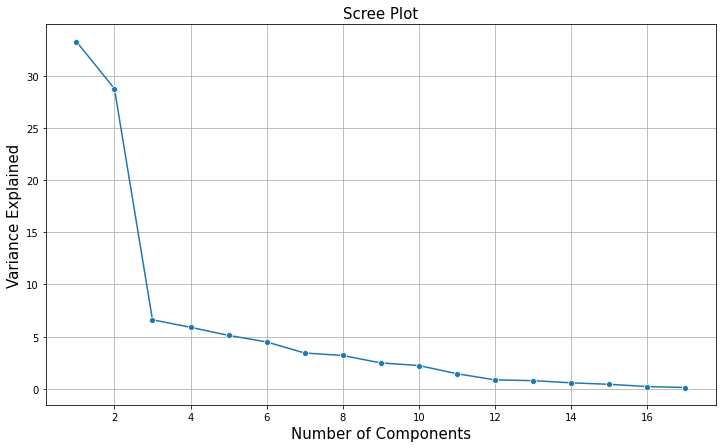

In [59]:
## Plotting the scree plot
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

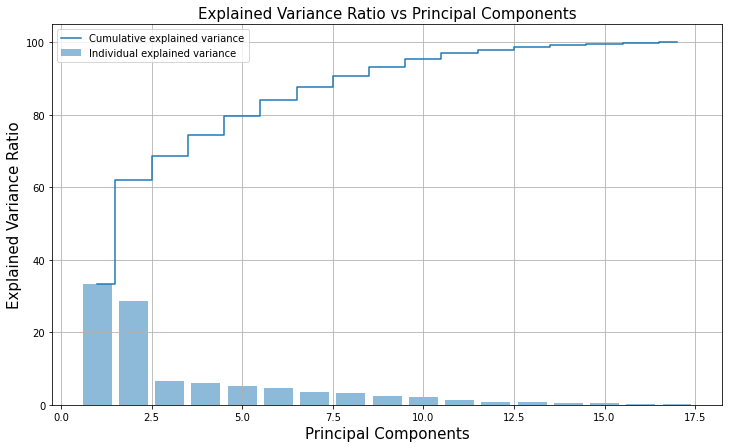

In [60]:
# Plotting 
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

##### PCAMethod 2

Use PCA from sklearn's decomposition class and find Principal Components

In [61]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 18 to 5)

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.60229153, -1.80481136, -1.60860416, ..., -0.57674291,
         6.57047877, -0.47704025],
       [ 0.99396467, -0.07009029, -1.38246959, ...,  0.01785211,
        -1.1859291 ,  1.04399274],
       [ 0.02986576,  2.12293284, -0.5014721 , ...,  0.32193034,
         1.32597201, -1.42582186],
       [-1.00864472,  3.1393544 , -0.03586998, ..., -0.5871823 ,
         0.07778028, -1.2998999 ],
       [-0.36633576,  2.45192252,  0.76615465, ...,  0.17527678,
         1.36845407,  0.72120747]])

In [62]:
pca.components_

array([[ 2.62229954e-01,  2.30624175e-01,  1.89344833e-01,
         3.38870612e-01,  3.34693925e-01,  1.63363953e-01,
         2.25370199e-02,  2.83418894e-01,  2.44165100e-01,
         9.67336197e-02, -3.51980721e-02,  3.26417621e-01,
         3.23125866e-01, -1.63117512e-01,  1.86577501e-01,
         3.28948915e-01,  2.38796220e-01],
       [ 3.14086037e-01,  3.44579410e-01,  3.82775616e-01,
        -9.93810159e-02, -5.95673511e-02,  3.98602853e-01,
         3.57544493e-01, -2.51926173e-01, -1.31948412e-01,
         9.39488008e-02,  2.32449626e-01,  5.50923798e-02,
         4.29817641e-02,  2.59836893e-01, -2.57127529e-01,
        -1.60079675e-01, -1.67560132e-01],
       [-8.09955428e-02, -1.07628688e-01, -8.55219360e-02,
         7.87314350e-02,  5.06859565e-02, -7.36990508e-02,
        -4.02991323e-02, -1.47793081e-02,  2.12471625e-02,
         6.97109227e-01,  5.30972095e-01, -8.11568320e-02,
        -5.90116463e-02, -2.74182670e-01, -1.03778841e-01,
         1.84231435e-01, -2.4

In [63]:
pca.explained_variance_ratio_

array([0.33264187, 0.28755372, 0.06617143, 0.05898404, 0.05123977])

In [64]:
df_pc=pca.explained_variance_ratio_


In [65]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([33.3, 62.1, 68.7, 74.6, 79.7])

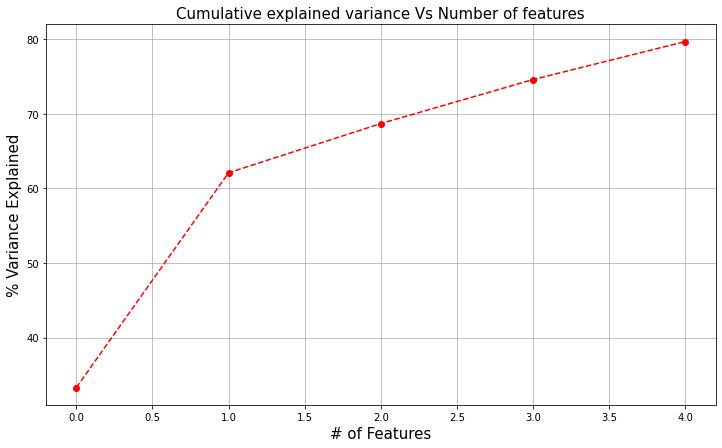

In [66]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative explained variance Vs Number of features',fontsize=15)
plt.grid()
plt.show()

The plot above clearly shows that maximum variance (somewhere around 33.3%) can be explained by the first principal component alone. The second,third,fourth and fifth principal component share almost less amount of information.Comparatively 6th onwards components share less amount of information as compared to the rest of the Principal components.But those information cannot be ignored since they both contribute almost 21% of the data.We are covering 80% variance by considering 5 features.

The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.

##### Correlation between components and features

In [67]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262230  0.230624  0.189345   0.338871   0.334694     0.163364   
1  0.314086  0.344579  0.382776  -0.099381  -0.059567     0.398603   
2 -0.080996 -0.107629 -0.085522   0.078731   0.050686    -0.073699   
3  0.098893  0.118256  0.009421  -0.369062  -0.416766     0.014042   
4  0.219853  0.189592  0.162328   0.157346   0.144606     0.102739   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022537  0.283419    0.244165  0.096734 -0.035198  0.326418  0.323126   
1     0.357544 -0.251926   -0.131948  0.093949  0.232450  0.055092  0.042982   
2    -0.040299 -0.014779    0.021247  0.697109  0.530972 -0.081157 -0.059012   
3     0.225334  0.263127    0.580772 -0.036305 -0.115165 -0.147493 -0.089232   
4    -0.095765  0.037403   -0.069435  0.035393 -0.000373 -0.550741 -0.590385   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163118     0.186578  0.328949   0.238796  
1   0.259837    -0.257128 -0.160080  -0.167560  
2  -0.274183    -0.103779  0.184231  -0.245356  
3  -0.259459    -0.223892  0.213763  -0.036091  
4  -0.142672     0.128301 -0.022538   0.356800

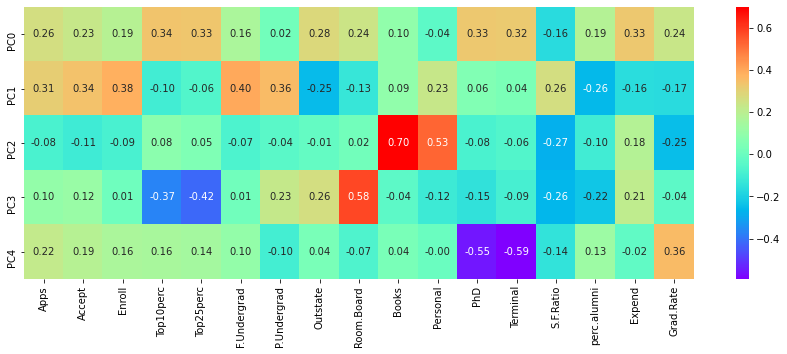

In [68]:
plt.figure(figsize=(15,5))
sns.heatmap(df_comp,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3','PC4'])
plt.show()

##### 2.8) Mention the business implication of using the Principal Component Analysis for this case study.

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself

1.PC0:Scholars : This Component Combines Top10% and Top25% Students in HSC, PhD candidates, Percentage of faculties with terminal degree--> It is Section where Scholars of College Comes.

2.PC1:Overall Admissions and Intake : No of Applications, No of Enrolled Students , No of Accepted Students, Full time Undergrad students, Part time Undergrad Students shows that they Mostly Contribute to Principal Component 1. we can name this Component as Overall Admissions and Intake as per our knowledge

3.PC2:Expenses: Personal and Books Expenses

4.PC3: Room and Boarding Expenses 

5.PC4: Graduation Rate 

So by using PCA we can Finally reduce 18 variables to 5 Principal Components.On basis of this we can give College Rankings,Acceptance Probability or Prediction of any random student will get admit or not from Particular college, College can decide its Fees on basis of This. College Can make Strategic Moves like Fees, How to attract more number of Scholars to College by providing them Scholarships, Fundings.
Whether to Increase Professors or Decrease it, Its impact on Admissions.
All this Kind Of Decision can be Made By Analysing data Ahead which is Produced by PCA.
Variables are Reduced, So now complex data is Looking Simpler, Without missing much Information